<div style="background-color:lightblue; padding:10px;"><h1 style="color:black;"> Bike-Sharing Demand in Urban Areas</h1></div>

### Project Scenario
This project is to analyze how weather would affect bike-sharing demand in urban areas. To complete this project,first need to collect and process related weather and bike-sharing demand data from various sources, perform exploratory data analysis on the data, and build predictive models to predict bike-sharing demand. Then combine results and connect them to a live dashboard displaying an interactive map and associated visualization of the current weather and the estimated bike demand.

<span style="background-color:lightpink; color:black; font-size:26px; font-weight:bold">Understanding the source data</span>

 In this project, we utilize a variety of datasets sourced from different origins employing diverse data collection methodologies. Extensive guidance is provided on accessing and retrieving these datasets, with comprehensive discussions elaborating on the procedures involved.

#### 1. Seoul Bike Sharing Demand Data Set
Seoul Bike Sharing Demand Data Set
Rental bikes are available in many cities around the globe. It is important for each of these cities to provide a reliable supply of rental bikes to optimize availability and accessibility to the public at all times.

Also important is minimizing the cost of these programs, in part by minimizing the number of bikes supplied in order to meet the demand. Thus, to help optimize the supply it would be helpful to be able to predict the number of bikes required each hour of the day, based on current conditions such as the weather.

The Seoul Bike Sharing Demand Data Set was designed for this purpose. It contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), and the number of bikes rented per hour and date.This dataset will use to build a linear regression model of the number of bikes rented each hour, based on the weather.

Attribute Information: 

Date : year-month-day
Rented Bike count - Count of bikes rented at each hour   
Hour - Hour of the day   
Temperature - Temperature in Celsius    
Humidity - unit is %    
Windspeed - unit is m/s   
Visibility - unit 10m  
Dew point temperature - Celsius   
Solar radiation - MJ/m2    
Rainfall - mm        
Snowfall - cm        
Seasons - Winter, Spring, Summer, Autumn     
Holiday - Holiday/No holiday        
Functional Day - NoFunc (Non Functional Hours), Fun(Functional hours)         

Relevant Paper and Citation Request:     
1- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. Using data mining techniques for bike sharing demand prediction in metropolitan city. Computer Communications, Vol.153, pp.353-366, March, 2020      
2- Sathishkumar V E and Yongyun Cho. A rule-based model for Seoul Bike sharing demand prediction using weather data European Journal of Remote Sensing, pp. 1-18, Feb, 2020  

#### 2. Open Weather API Data
The Open Weather API allows users to access current and forecasted weather data for any location including over 200,000 cities. OpenWeather collects and processes weather data from different sources such as global and local weather models, satellites, radars and a vast network of weather stations.

We can access the data that will need for the project for free by registering for a Free Subscription. It will require the details that need to sign up and to gain access to the data using HTTP request with R. The data we will be connecting to provides the weather forecast for every 3 hours over the next 5 days.

#### 3. Global Bike Sharing Systems Dataset
The Global Bike Sharing Cities Dataset is an HTML table on the Wikipedia page List of bicycle-sharing systems: https://en.wikipedia.org/wiki/List_of_bicycle-sharing_systems.
It lists active bicycle-sharing systems around the world. Most systems listed allow users to pick up and drop off bicycles at any of the automated stations within the network.


#### 4. World Cities Data
The World Cities Data contains information such as name, latitude, and longitude, about major cities around the world.

<span style="background-color:lightpink; color:black; font-size:26px; font-weight:bold">Collecting the Data</span>


#### Bike-sharing Demand and Weather Data Collection
To be able to analyze and predict bike-sharing demands for a city, we will need to collect relevant data from various sources including global bike sharing systems on public web pages, weather data via OpenWeather APIs, and aggregated tabular data from cloud storage, etc., as shown below:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/module_1/images/l2-data-collection.png)

After the data collection process is completed, will get the following raw data all stored in csv file format:

<span style="background-color:white; color:red"> raw_bike_sharing_systems.csv </span>: A list active bike-sharing systems across the world      
<span style= "Background-color:white; color:red"> raw_cities_weather_forecast.csv </span>: 5-day weather forecast for a list of cities from OpenWeather API     
<span style="background-color:white; color:red">raw_worldcities.csv </span>: A list of major cities’ info (such as name, latitude and longitude) across the world       
<span style="background-color:white; color:red">raw_seoul_bike_sharing.csv </span>: Contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour, and date information, from Seoul bike-sharing systems.

<span style="background-color:orange; color:black; font-size:20px; font-weight:bold">1. Web Scrape a Global Bike-Sharing Systems Wiki Page</span>

First import necessary libraries for the webscraping task. The rvest library is used to obtain the bike sharing systems table from the web page, converting the table into a data frame, and write the data frame to a csv file for future data wrangling and analysis tasks.

In [1]:
# Checking if need to install `rvest` library
require("rvest")
library(rvest)
library(xml2)

Loading required package: rvest



#### Extract `Bike-Sharing Systems` HTML table from a Wiki page and convert it into a data frame


In [2]:
url <- "https://en.wikipedia.org/wiki/List_of_bicycle-sharing_systems"
root_node <- read_html(url)
table_node <- html_nodes(root_node, "table")
table_content <- html_table(table_node, fill = TRUE)[[1]]
# Convert the bike-sharing system table into a dataframe
raw_bike_sharing_systems <- as.data.frame(table_content)

In [3]:
# Summarize the dataframe
summary(raw_bike_sharing_systems)

   Country              City               Name              System         
 Length:564         Length:564         Length:564         Length:564        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   Operator           Launched         Discontinued         Stations        
 Length:564         Length:564         Length:564         Length:564        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   Bicycles         Daily ridership   
 Length:564         Length:564        
 Class :character   Class :character  
 Mode  :character   Mode  :character  

In [4]:
# Export the dataframe into a csv file
write.csv(raw_bike_sharing_systems, "raw_bike_sharing_systems.csv")

<span style="background-color:orange; color:black; font-size:20px; font-weight:bold">2. Data Collection with OpenWeather API Through HTTP Request</span>    

Collecting real-time current and forecasted weather data for cities using the OpenWeather API. It can give you current weather data for any location including over 200,000 cities and 5 day forecasts for free (with limited API usage). You just need to use HTTP requests to call those weather APIs and get the weather data.

There are given instructions to set up a free OpenWeather API account with an API key for authentication. Then, you will be shown, with code examples, how to get the current weather for a given city. After you are familiar with OpenWeather API, you will be asked to get 5-day forecast data for a list of cities.

First, setup OpenWeather API account, then create an OpenWeather API account here. After your account has been created and verified, you can go to Account -> My API Keys:
Now mark down your generated API key, which will be used to authenticate your HTTP requests to OpenWeather API.

Note that a new API key may take some time to be activated. You may quickly try the following URL using a web browser.
With the {your_api_key} URL parameter replaced by your own API key and go to the following URL:
https://api.openweathermap.org/data/2.5/weather?q=Seoul&appid={your_api_key}

until you see some weather data returned (instead of 401 or other error status), similar to the following JSON result:    
{"coord":{"lon":126.9778,"lat":37.5683},
"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],
"base":"stations",
"main":{"temp":285.16,"feels_like":284.04,"temp_min":284.15,"temp_max":287.15,"pressure":1020,"humidity":62},
"visibility":10000,
"wind":{"speed":1.03,"deg":220},"clouds":{"all":0},"dt":1617718307,"sys":{"type":1,"id":8105,"country":"KR","sunrise":1617657021,"sunset":1617703103},"timezone":32400,"id":1835848,"name":"Seoul

### Get the current weather data for a city `Seoul` using OpenWeather API
First I have created a free account with OpenWeather to be able to use the API. Retrieve current weather information for Seoul.

In [5]:
# Check if need to install rvest` library
require(httr)
library(httr)

Loading required package: httr



In [6]:
# URL for Current Weather API
current_weather_url <- 'https://api.openweathermap.org/data/2.5/weather'
# The real API key
api_key <- "b12d67d05a0de12f16d4668c1e2b1f00"

# Input `q` is the city name and Input `appid` is API KEY, and Input `units` are preferred units such as Metric or Imperial
current_query <- list(q = "Seoul", appid = api_key, units = "metric")
response <- GET(current_weather_url, query = current_query)
http_type(response)

[1] "application/json"

In [7]:
# Now using JSON to read response.
json_result <- content(response, as = "parsed")
class(json_result)
json_result

[1] "list"

$coord
$coord$lon
[1] 126.9778

$coord$lat
[1] 37.5683


$weather
$weather[[1]]
$weather[[1]]$id
[1] 800

$weather[[1]]$main
[1] "Clear"

$weather[[1]]$description
[1] "clear sky"

$weather[[1]]$icon
[1] "01d"



$base
[1] "stations"

$main
$main$temp
[1] 18.96

$main$feels_like
[1] 18.09

$main$temp_min
[1] 18.76

$main$temp_max
[1] 19.69

$main$pressure
[1] 1015

$main$humidity
[1] 45


$visibility
[1] 10000

$wind
$wind$speed
[1] 3.09

$wind$deg
[1] 80


$clouds
$clouds$all
[1] 0


$dt
[1] 1712204758

$sys
$sys$type
[1] 1

$sys$id
[1] 8105

$sys$country
[1] "KR"

$sys$sunrise
[1] 1712178778

$sys$sunset
[1] 1712224608


$timezone
[1] 32400

$id
[1] 1835848

$name
[1] "Seoul"

$cod
[1] 200

It contains very detailed weather data about the city of Seoul.We need to convert the named list to a data frame so that we can use data frame operations to process the data.


In [8]:
# Create some empty vectors to hold data temporarily
weather <- c()
visibility <- c()
temp <- c()
temp_min <- c()
temp_max <- c()
pressure <- c()
humidity <- c()
wind_speed <- c()
wind_deg <- c()

In [9]:
# Now assign the values in the `json_result` list into different vectors
weather <- c(weather, json_result$weather[[1]]$main)
visibility <- c(visibility, json_result$visibility)
temp <- c(temp, json_result$main$temp)
temp_min <- c(temp_min, json_result$main$temp_min)
temp_max <- c(temp_max, json_result$main$temp_max)
pressure <- c(pressure, json_result$main$pressure)
humidity <- c(humidity, json_result$main$humidity)
wind_speed <- c(wind_speed, json_result$wind$speed)
wind_deg <- c(wind_deg, json_result$wind$deg)

In [10]:
# Combine all vectors as columns of a data frame
weather_df <- data.frame(
  weather = weather,
  visibility = visibility,
  temp = temp,
  temp_min = temp_min,
  temp_max = temp_max,
  pressure = pressure,
  humidity = humidity,
  wind_speed = wind_speed,
  wind_deg = wind_deg
)

In [11]:
# Check the generated data frame
print(weather_df)

  weather visibility  temp temp_min temp_max pressure humidity wind_speed
1   Clear      10000 18.96    18.76    19.69     1015       45       3.09
  wind_deg
1       80


### Get 5-day weather forecasts for a list of cities using the OpenWeather API

In [12]:
# Create some empty vectors to hold data temporarily
city <- c()
weather <- c()
visibility <- c()
temp <- c()
temp_min <- c()
temp_max <- c()
pressure <- c()
humidity <- c()
wind_speed <- c()
wind_deg <- c()
forecast_datetime <- c()

In [13]:
# Get forecast data for a given city list
weather_forecaset_by_cities <- function(city_names) {
  df <- data.frame()
  for (city_name in city_names) {
    forecast_url <- "https://api.openweathermap.org/data/2.5/forecast"
    forecast_query <- list(q = city_name, appid = "b8679843d3fe1f0e481c43bdd18e0cb6", units = "metric")
    forecast_response <- GET(forecast_url, query = forecast_query)
    forecast_json_list <- content(forecast_response, as = "parsed")
    results <- forecast_json_list$list
    result <- c(1:40)
    
# Loop the json result
      for (x in result) {
      city <- c(city, city_name)
      weather <- c(weather, results[[x]]$weather[[1]]$main)
      visibility <- c(visibility, results[[x]]$visibility)
      temp <- c(temp, results[[x]]$main$temp)
      temp_min <- c(temp_min, results[[x]]$main$temp_min)
      temp_max <- c(temp_max, results[[x]]$main$temp_max)
      pressure <- c(pressure, results[[x]]$main$pressure)
      humidity <- c(humidity, results[[x]]$main$humidity)
      wind_speed <- c(wind_speed, results[[x]]$wind$speed)
      wind_deg <- c(wind_deg, results[[x]]$wind$deg)
      forecast_datetime <- c(forecast_datetime, results[[x]]$dt_txt)
    }      
    df <- data.frame(
      city = city, weather = weather,
      visibility = visibility,
      temp = temp,
      temp_min = temp_min,
      temp_max = temp_max,
      pressure = pressure,
      humidity = humidity,
      wind_speed = wind_speed,
      wind_deg = wind_deg,
      forecast_datetime
    )
  }
    
  return(df)
}

In [14]:
cities <- c("Seoul", "Delhi", "Washington, D.C.", "Paris")
cities_weather_df <- weather_forecaset_by_cities(cities)

In [15]:
# Write cities_weather_df to `cities_weather_forecast.csv`
write.csv(cities_weather_df, "raw_cities_weather_forecast.csv", row.names = FALSE)

<span style="background-color:orange; color:black; font-size:20px; font-weight:bold">3. Data Collection from Cloud Storage</span>    
Download datasets as csv files from cloud storage:

In [16]:
# Download several datasets

# Download some general city information such as name and locations
url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/raw_worldcities.csv" 
# download the file
download.file(url, destfile = "raw_worldcities.csv")

# Download a specific hourly Seoul bike sharing demand dataset
url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/raw_seoul_bike_sharing.csv"
# download the file
download.file(url, destfile = "raw_seoul_bike_sharing.csv")

<span style="background-color:pink; color:black; font-size:26px; font-weight:bold">Data Wrangling</span>

By now, all the required bike-sharing data have been collected for further exploratory, visual, and predictive analysis tasks. However, some data may contain missing, misformatted and/or unexpected noises. Such sources of noise may downgrade the analysis performance significantly. Thus, we need to perform data wrangling before further analysing the data.
Data wrangling aims to remove the noise from data and convert the undesired data format to a format that is likely to be better for analysis.

This project will go through the following data wrangling processes. Data Wrangling with stringr and regular expressions:   
A. Standardize column names for all collected datasets   
B. Remove undesired reference links using regular expressions   
C. Extract numeric values using regular expressions     

Data wrangling with dplyr:    
A. Detect and handle missing values   
B. Create indicator (dummy) variables for categorical variables    
C. Normalize data      

Data Wrangling with stringr and Regular Expressions:    
We will again use regular expressions, along with the stringr package (part of tidyverse), to clean up the bike-sharing systems data that you previously web scraped from the wiki page: https://en.wikipedia.org/wiki/List_of_bicycle-sharing_systems     
For example:    
- Textual annotations in numeric fields: 1000 (Updated with 1050)  
- Attached reference links: Bike sharing system [123]   
- Inconsistent data formats: Yes and Y for the logical value TRUE or 2021-04-09 and Apr 09, 2021 for the same date    
- HTML style tags: Bike sharing system   
- Special characters: &nbsp for a white space   

To summarize, we will be using stringr (part of tidyverse) and regular expressions to perform the following data wrangling tasks:
- TASK: Standardize column names for all collected datasets
- TASK: Remove undesired reference links from the scraped bike-sharing systems dataset   
- TASK: Extract only the numeric value from undesired text annotations    
- TASK: Standardize column names for all collected datasets    

To improve dataset readbility by both human and computer systems, we first need to standardize the column names of the datasets above using the following naming convention:   
- Column names need to be UPPERCASE  
- The word separator needs to be an underscore, such as in COLUMN_NAME   

#### Data Wrangling with Regular Expressions

In [18]:
require("tidyverse")
library(tidyverse)

In [19]:
# `for` loop to iterate over the above datasets and convert their column names 
dataset_list <- c("raw_bike_sharing_systems.csv", "raw_seoul_bike_sharing.csv", "raw_cities_weather_forecast.csv", "raw_worldcities.csv")
for (dataset_name in dataset_list) {
    dataset <- read.csv(dataset_name)
    names(dataset) <- toupper(names(dataset))
    names(dataset) <- str_replace_all(names(dataset), " ", "_")
    write.csv(dataset, dataset_name, row.names = FALSE)
   }

In [20]:
# Check the columns name whether they followed the naming convection
for (dataset_name in dataset_list) {
  dataset <- suppressMessages(read_csv(dataset_name))
  print(colnames(dataset))
}

 [1] "X"               "COUNTRY"         "CITY"            "NAME"           
 [5] "SYSTEM"          "OPERATOR"        "LAUNCHED"        "DISCONTINUED"   
 [9] "STATIONS"        "BICYCLES"        "DAILY.RIDERSHIP"
 [1] "DATE"                  "RENTED_BIKE_COUNT"     "HOUR"                 
 [4] "TEMPERATURE"           "HUMIDITY"              "WIND_SPEED"           
 [7] "VISIBILITY"            "DEW_POINT_TEMPERATURE" "SOLAR_RADIATION"      
[10] "RAINFALL"              "SNOWFALL"              "SEASONS"              
[13] "HOLIDAY"               "FUNCTIONING_DAY"      
 [1] "CITY"              "WEATHER"           "VISIBILITY"       
 [4] "TEMP"              "TEMP_MIN"          "TEMP_MAX"         
 [7] "PRESSURE"          "HUMIDITY"          "WIND_SPEED"       
[10] "WIND_DEG"          "FORECAST_DATETIME"
 [1] "CITY"       "CITY_ASCII" "LAT"        "LNG"        "COUNTRY"   
 [6] "ISO2"       "ISO3"       "ADMIN_NAME" "CAPITAL"    "POPULATION"
[11] "ID"        


### Process the web-scraped `bike-sharing system` dataset 

In [21]:
# First load the dataset
bike_sharing_df <- read_csv("raw_bike_sharing_systems.csv")
# Print its head
head(bike_sharing_df)

Rows: 564 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (10): COUNTRY, CITY, NAME, SYSTEM, OPERATOR, LAUNCHED, DISCONTINUED, STA...
dbl  (1): X

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,COUNTRY,CITY,NAME,SYSTEM,OPERATOR,LAUNCHED,DISCONTINUED,STATIONS,BICYCLES,DAILY.RIDERSHIP
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Albania,Tirana[5],Ecovolis,NA,NA,March 2011,NA,8,200,NA
2,Argentina,Buenos Aires[6][7],Ecobici,Serttel Brasil[8],Bike In Baires Consortium[9],2010,NA,400,4000,21917
3,Argentina,Mendoza[10],Metrobici,NA,NA,2014,NA,2,40,NA
4,Argentina,Rosario,Mi Bici Tu Bici[11],NA,NA,2 December 2015,NA,47,480,NA
5,Argentina,"San Lorenzo, Santa Fe",Biciudad,Biciudad,NA,27 November 2016,NA,8,80,NA
6,Australia,Melbourne[12],Melbourne Bike Share,PBSC & 8D,Motivate,June 2010,30 November 2019[13],53,676,NA


In [22]:
# first drop first column which include the raw number
bike_sharing_df <- bike_sharing_df[, -1]

In [23]:
# Select the following revelant columns for this project
bike_sharing_df <- bike_sharing_df %>% select(COUNTRY, CITY, SYSTEM, BICYCLES)

In [24]:
# class of the selected columns
bike_sharing_df %>%
  summarize_all(class) %>%
  gather(variable, class)

variable,class
<chr>,<chr>
COUNTRY,character
CITY,character
SYSTEM,character
BICYCLES,character


The `BICYCLES` column in the dataset is mistakenly interpreted as character data instead of numeric. This may be due to non-numeric characters present in some entries. 

In [25]:
# A function called `find_character` is used to identify these characters.
find_character <- function(strings) grepl("[^0-9]", strings)

# find any elements in the Bicycles column containing non-numeric characters.
bike_sharing_df %>%
  select(BICYCLES) %>%
  filter(find_character(BICYCLES)) %>%
  slice(0:10)

BICYCLES
<chr>
1790 (2019)[21]
4200 (2021)
4115[25]
7270 (regular) 2395 (electric)[38]
780 (2023)
310[66]
500[76]
[79]
180[80]


Examining the `COUNTRY`, `CITY`, and `SYSTEM` columns in the dataset for any unwanted reference links, like "Melbourne[12]", to ensure data integrity.

In [26]:
# Define a 'reference link' character class,`[A-z0-9]` means at least one character
# `\\[` and `\\]` means the character is wrapped by [], such as for [12] or [abc]
ref_pattern <- "\\[[A-z0-9]+\\]"
find_reference_pattern <- function(strings) grepl(ref_pattern, strings)

# Check whether the COUNTRY column has any reference links
bike_sharing_df %>%
  select(COUNTRY) %>%
  filter(find_reference_pattern(COUNTRY)) %>%
  slice(0:10)

COUNTRY
<chr>
Vila do Conde[240]
Vilamoura[241]


In [27]:
# Check whether the CITY column has any reference links
bike_sharing_df %>%
  select(CITY) %>%
  filter(find_reference_pattern(CITY)) %>%
  slice(0:10)

CITY
<chr>
Tirana[5]
Buenos Aires[6][7]
Mendoza[10]
Melbourne[12]
Melbourne[12]
Brisbane[14][15]
Lower Austria[16]
Different locations[19]
Brussels[24]


In [28]:
# Check whether the System column has any reference links
bike_sharing_df %>%
  select(SYSTEM) %>%
  filter(find_reference_pattern(SYSTEM)) %>%
  slice(0:10)

SYSTEM
<chr>
Serttel Brasil[8]
EasyBike[65]
4 Gen.[73]
3 Gen. SmooveKey[137]
3 Gen. Smoove[164][165][166][162]
3 Gen. Smoove[203]
3 Gen. Smoove[205]
3 Gen. Smoove[207]


#### Remove undesired reference links using regular expressions. 

In [29]:
# remove reference link
remove_ref <- function(x) {
    ref_pattern <- "\\[[A-z0-9]+\\]"
    x <- str_replace_all(x, ref_pattern, "")
    x <- trimws(x)
    return(x)
    }
# mutate() function to apply the remove_ref function to the COUNTRY, CITY, and SYSTEM columns
bike_sharing_df <- bike_sharing_df %>%
                    mutate(
                        COUNTRY = remove_ref(COUNTRY),
                        CITY = remove_ref(CITY),
                        SYSTEM = remove_ref(SYSTEM)
                        )

In [30]:
#check whether all reference links are removed:
bike_sharing_df %>%
  select(COUNTRY, CITY, SYSTEM, BICYCLES) %>%
  filter(find_reference_pattern(COUNTRY) | find_reference_pattern(CITY) | find_reference_pattern(SYSTEM) | find_reference_pattern(BICYCLES))

COUNTRY,CITY,SYSTEM,BICYCLES
<chr>,<chr>,<chr>,<chr>
Belgium,Different locations,Blue-bike,1790 (2019)[21]
Belgium,Brussels,3 Gen. Cyclocity,4115[25]
Canada,Montreal,PBSC & 8D,7270 (regular) 2395 (electric)[38]
Cyprus,"Limassol, Nicosia District",3 Gen. Smoove,310[66]
Czechia,Prague,NA,500[76]
Czechia,Prague 7,4 Gen. Ofo,[79]
Czechia,Prostějov,3 Gen. nextbike,180[80]
Czechia,Ostrava,3 Gen. nextbike,600[83]
Denmark,Farsø,2 Gen,[90]


#### Extract the numeric value using regular expressions

In [31]:
# Extract the first number
extract_num <- function(column) {
    digitals_pattern <- "[0-9]"
    str_extract(column, digitals_pattern)
    column <- as.numeric(column)
}
# use mutate() function to apply `extract_num` on the `BICYCLES` column
bike_sharing_df <- bike_sharing_df %>% mutate(BICYCLES = extract_num(BICYCLES))

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `BICYCLES = extract_num(BICYCLES)`.
Caused by warning in `extract_num()`:
! NAs introduced by coercion"


In [32]:
#check whether reference links of `BICYCLES` is removed:
bike_sharing_df %>%
  select(BICYCLES) %>%
  filter(grepl("\\[[A-z0-9]+\\]", BICYCLES))

BICYCLES
<dbl>


In [33]:
summary(bike_sharing_df$BICYCLES)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      4      70     300    1882    1000   78000     147 

Write the cleaned bike-sharing systems dataset into a csv file called bike_sharing_systems.csv

In [34]:
write.csv(bike_sharing_df, "bike_sharing_systems.csv", row.names = FALSE)

### Data Wrangling with with `Dplyr`
The primary focus is on wrangling the `seoul bike-sharing` demand historical dataset, which serves as the fundamental dataset for constructing a predictive model later. Utilizing tidyverse, we aim to execute the following data wrangling tasks:
- TASK: Detect and handle missing values
- TASK: Create indicator (dummy) variables for categorical variables
- TASK: Normalize data

In [35]:
# load `Seoul Bike-Sharing` data set
seoul_bike_sharing <- read_csv("raw_seoul_bike_sharing.csv")

Rows: 8760 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): DATE, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_COUNT, HOUR, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBI...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
# Check the NA's 
colSums(is.na(seoul_bike_sharing))
# dataset summary
summary(seoul_bike_sharing)

DATE     RENTED_BIKE_COUNT                  HOUR 
                    0                   295                     0 
          TEMPERATURE              HUMIDITY            WIND_SPEED 
                   11                     0                     0 
           VISIBILITY DEW_POINT_TEMPERATURE       SOLAR_RADIATION 
                    0                     0                     0 
             RAINFALL              SNOWFALL               SEASONS 
                    0                     0                     0 
              HOLIDAY       FUNCTIONING_DAY 
                    0                     0

     DATE           RENTED_BIKE_COUNT      HOUR        TEMPERATURE    
 Length:8760        Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 214.0    1st Qu.: 5.75   1st Qu.:  3.40  
 Mode  :character   Median : 542.0    Median :11.50   Median : 13.70  
                    Mean   : 729.2    Mean   :11.50   Mean   : 12.87  
                    3rd Qu.:1084.0    3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
                    NA's   :295                       NA's   :11      
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700      
 Median :57.00   Median :1.500   Median :1698   Median :  5.100      
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800      
 Max.   :98.

The summary indicates that columns, `RENTED_BIKE_COUNT`, `TEMPERATURE`, `HUMIDITY`, `WIND_SPEED`, `VISIBILITY`, `DEW_POINT_TEMPERATURE`, `SOLAR_RADIATION, RAINFALL`, and `SNOWFALL`, contain numerical data and require normalization. Additionally, `RENTED_BIKE_COUNT` and `TEMPERATURE` have missing values that must be addressed.

`SEASONS`, `HOLIDAY`, and `FUNCTIONING_DAY` are categorical variables that should be converted into indicator columns or dummy variables. It's also noted that `HOUR`, initially perceived as numerical, is actually categorical, with levels spanning from 0 to 23.

#### TASK: Detect and handle missing values
The `RENTED_BIKE_COUNT` column exhibits approximately 295 missing values, while `TEMPERATURE` has around 11 missing values. These gaps in data might result from unrecorded entries or issues with bike-sharing system functionality or weather sensor networks. Regardless of the cause, it's essential to appropriately address these missing values.

#### Firstly, handle the missing values in the `RENTED_BIKE_COUNT` column
Since `RENTED_BIKE_COUNT` serves as the response variable for prediction and missing values are generally not acceptable for response variables, they must be either dropped or imputed correctly. With only about 3% missing values in `RENTED_BIKE_COUNT` (295 out of 8760), it's safe to drop any rows with missing values in this column.

In [38]:
# Drop rows with `RENTED_BIKE_COUNT` column == NA
seoul_bike_sharing <- seoul_bike_sharing %>% filter(!is.na(RENTED_BIKE_COUNT))
# Print the dataset dimension again after those rows are dropped
dim(seoul_bike_sharing)

[1] 8465   14

#### Now, processing missing values for the `TEMPERATURE` column.
Although `TEMPERATURE` isn't the response variable like `RENTED_BIKE_COUNT`, it's a crucial predictor. Missing values for `TEMPERATURE` can be handled by imputation rather than simply removing rows, given its potential correlation with `RENTED_BIKE_COUNT`, as higher temperatures might correlate with increased bike rentals.

In [39]:
# processing missing values for the TEMPERATURE column.
seoul_bike_sharing %>% filter(is.na(TEMPERATURE))

DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
07/06/2018,3221,18,NA,57,2.7,1217,16.4,0.96,0.0,0,Summer,No Holiday,Yes
12/06/2018,1246,14,NA,45,2.2,1961,12.7,1.39,0.0,0,Summer,No Holiday,Yes
13/06/2018,2664,17,NA,57,3.3,919,16.4,0.87,0.0,0,Summer,No Holiday,Yes
17/06/2018,2330,17,NA,58,3.3,865,16.7,0.66,0.0,0,Summer,No Holiday,Yes
20/06/2018,2741,19,NA,61,2.7,1236,17.5,0.60,0.0,0,Summer,No Holiday,Yes
30/06/2018,1144,13,NA,87,1.7,390,23.2,0.71,3.5,0,Summer,No Holiday,Yes
05/07/2018,827,10,NA,75,1.1,1028,20.8,1.22,0.0,0,Summer,No Holiday,Yes
11/07/2018,634,9,NA,96,0.6,450,24.9,0.41,0.0,0,Summer,No Holiday,Yes
12/07/2018,593,6,NA,93,1.1,852,24.3,0.01,0.0,0,Summer,No Holiday,Yes


It seems that all of the missing values for TEMPERATURE are found in SEASONS == Summer, so it is reasonable to impute those missing values with the summer average temperature

#### Impute missing values for the `TEMPERATURE` column using its mean value.

In [40]:
# Calculate the summer average temperature
summer_avg_temp <- seoul_bike_sharing %>%
  filter(SEASONS == "Summer") %>%
  select(TEMPERATURE) %>%
  summarise(mean(TEMPERATURE, na.rm = TRUE)) %>%
  unlist() %>%
  unname()

# Impute missing values for TEMPERATURE column with summer average temperature
seoul_bike_sharing$TEMPERATURE <- replace_na(seoul_bike_sharing$TEMPERATURE, summer_avg_temp)

# Check NA values has been replaced and no more NA values
seoul_bike_sharing %>%
  filter(is.na(TEMPERATURE))

DATE,RENTED_BIKE_COUNT,HOUR,TEMPERATURE,HUMIDITY,WIND_SPEED,VISIBILITY,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SEASONS,HOLIDAY,FUNCTIONING_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>


In [41]:
# Save the dataset as `seoul_bike_sharing.csv`
write.csv(seoul_bike_sharing, "seoul_bike_sharing.csv", row.names = FALSE)

### TASK: Create indicator (dummy) variables for categorical variables
Categorical variables like `SEASONS`, `HOLIDAY`, and `FUNCTIONING_DAY` need to be converted into indicator variables for regression models. `HOUR`, while appearing numerical, is actually categorical with values ranging from 0 to 23.

In [42]:
# Convert HOUR column from numeric into character firs
seoul_bike_sharing <- seoul_bike_sharing %>% mutate(HOUR = as.character(HOUR))

In [43]:
# Assessing the other columns
seoul_bike_sharing %>% distinct(SEASONS)
seoul_bike_sharing %>% distinct(HOLIDAY)
seoul_bike_sharing %>% distinct(FUNCTIONING_DAY)

SEASONS
<chr>
Winter
Spring
Summer
Autumn


HOLIDAY
<chr>
No Holiday
Holiday


FUNCTIONING_DAY
<chr>
Yes


In [44]:
# Convert SEASONS, HOLIDAY and HOUR columns into indicator columns.
col <- c("SEASONS", "HOLIDAY", "HOUR")
feature <- function(x) {
    for (x in col) {
        seoul_bike_sharing <<- seoul_bike_sharing %>%
        mutate(dummy = 1) %>%
        spread(key = x, value = dummy, fill = 0)
    }
}
feature()

In [45]:
# Print the dataset summary again to make sure the indicator columns are created properly
summary(seoul_bike_sharing)

     DATE           RENTED_BIKE_COUNT  TEMPERATURE        HUMIDITY    
 Length:8465        Min.   :   2.0    Min.   :-17.80   Min.   : 0.00  
 Class :character   1st Qu.: 214.0    1st Qu.:  3.00   1st Qu.:42.00  
 Mode  :character   Median : 542.0    Median : 13.50   Median :57.00  
                    Mean   : 729.2    Mean   : 12.77   Mean   :58.15  
                    3rd Qu.:1084.0    3rd Qu.: 22.70   3rd Qu.:74.00  
                    Max.   :3556.0    Max.   : 39.40   Max.   :98.00  
   WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE SOLAR_RADIATION 
 Min.   :0.000   Min.   :  27   Min.   :-30.600       Min.   :0.0000  
 1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100       1st Qu.:0.0000  
 Median :1.500   Median :1690   Median :  4.700       Median :0.0100  
 Mean   :1.726   Mean   :1434   Mean   :  3.945       Mean   :0.5679  
 3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200       3rd Qu.:0.9300  
 Max.   :7.400   Max.   :2000   Max.   : 27.200       Max.   :3.5200  
    RA

In [46]:
# Save the dataset as `seoul_bike_sharing_converted.csv`
write_csv(seoul_bike_sharing, "seoul_bike_sharing_converted.csv")

#### TASK: Normalize data
The columns RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, DEW_POINT_TEMPERATURE, SOLAR_RADIATION, RAINFALL, and SNOWFALL consist of numerical data with varying value units and ranges. Given their disparate scales, columns with larger values can potentially skew predictive models and diminish their accuracy. Hence, it's imperative to normalize these numeric columns to bring them into a comparable range.
For this project, the normalization technique employed is Min-max normalization.

In [48]:
library(scales)
# Use the `mutate()` function to apply min-max normalization on columns and use rescale() with to values as 0 and 1 for min/ max normalization.
seoul_bike_sharing <<- seoul_bike_sharing %>%
  mutate(RENTED_BIKE_COUNT = rescale(RENTED_BIKE_COUNT, to = 0:1), 
         TEMPERATURE = rescale(TEMPERATURE, to = 0:1), 
         HUMIDITY = rescale(HUMIDITY, to = 0:1), 
         WIND_SPEED = rescale(WIND_SPEED, to = 0:1), 
         VISIBILITY = rescale(VISIBILITY, to = 0:1), 
         DEW_POINT_TEMPERATURE = rescale(DEW_POINT_TEMPERATURE, to = 0:1), 
         SOLAR_RADIATION = rescale(SOLAR_RADIATION, to = 0:1), 
         RAINFALL = rescale(RAINFALL, to = 0:1), 
         SNOWFALL = rescale(SNOWFALL, to = 0:1))

In [49]:
# Print the summary of the dataset again to make sure the numeric columns range between 0 and 1
summary(seoul_bike_sharing)

     DATE           RENTED_BIKE_COUNT  TEMPERATURE        HUMIDITY     
 Length:8465        Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:0.05965   1st Qu.:0.3636   1st Qu.:0.4286  
 Mode  :character   Median :0.15194   Median :0.5472   Median :0.5816  
                    Mean   :0.20460   Mean   :0.5345   Mean   :0.5933  
                    3rd Qu.:0.30445   3rd Qu.:0.7080   3rd Qu.:0.7551  
                    Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
   WIND_SPEED       VISIBILITY     DEW_POINT_TEMPERATURE SOLAR_RADIATION   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000        Min.   :0.000000  
 1st Qu.:0.1216   1st Qu.:0.4602   1st Qu.:0.4412        1st Qu.:0.000000  
 Median :0.2027   Median :0.8429   Median :0.6107        Median :0.002841  
 Mean   :0.2332   Mean   :0.7131   Mean   :0.5977        Mean   :0.161326  
 3rd Qu.:0.3108   3rd Qu.:1.0000   3rd Qu.:0.7924        3rd Qu.:0.264205  
 Max.   :1.0000   Max.   :1.0000   Max. 

In [50]:
# Save the dataset as `seoul_bike_sharing_converted_normalized.csv`
write_csv(seoul_bike_sharing, "seoul_bike_sharing_converted_normalized.csv")

#### Standardize the column names again for the new datasets

In [51]:
# Dataset list
dataset_list <- c("seoul_bike_sharing.csv", "seoul_bike_sharing_converted.csv", "seoul_bike_sharing_converted_normalized.csv")
for (dataset_name in dataset_list) {
  dataset <- read_csv(dataset_name)
  names(dataset) <- toupper(names(dataset))
  names(dataset) <- str_replace_all(names(dataset), " ", "_")
  write.csv(dataset, dataset_name, row.names = FALSE)
}

Rows: 8465 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): DATE, SEASONS, HOLIDAY, FUNCTIONING_DAY
dbl (10): RENTED_BIKE_COUNT, HOUR, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBI...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8465 Columns: 41
── Column specification ───────────────────────────────────────────────────────────────────────────────────

<span style="background-color:pink; color:black; font-size:26px; font-weight:bold">Performing Exploratory Data Analysis with SQL, Tidyverse & ggplot2</span>

<span style="background-color:orange; color:black; font-size:20px; font-weight:bold">Exploratory Data Analysis with SQL</span>    
#### Create tables and load data in SQLite using RSQLite

In [52]:
# Load the RSQLite package and DBI 
library(RSQLite)
library(DBI)
# Define database connection
con <- dbConnect(RSQLite::SQLite(),"RDB.sqlite")
con

<SQLiteConnection>
  Path: C:\Users\priya\OneDrive\Desktop\Jupyter_Notebook\RDB.sqlite
  Extensions: TRUE

In [53]:
# Read CSV into R Dataframe
worldcities <- read.csv("raw_worldcities.csv")
bike_sharing_systems <- read.csv("bike_sharing_systems.csv")
cities_weather_forecast <- read.csv("raw_cities_weather_forecast.csv")
seoul_bike_sharing <- read.csv("seoul_bike_sharing.csv")

In [54]:
# Get the list of existing tables
tables <- dbListTables(con)
# Drop each table
for (table_name in tables) {
  query <- paste("DROP TABLE IF EXISTS", table_name)
  dbExecute(con, query)
}

In [55]:
# Create and Load Datasets into SQLite tables
dbWriteTable(con, "WORLD_CITIES", worldcities)
dbWriteTable(con, "BIKE_SHARING_SYSTEMS", bike_sharing_systems)
dbWriteTable(con, "CITIES_WEATHER_FORECAST", cities_weather_forecast)
dbWriteTable(con, "SEOUL_BIKE_SHARING", seoul_bike_sharing)

In [56]:
dbListTables(con)

[1] "BIKE_SHARING_SYSTEMS"    "CITIES_WEATHER_FORECAST"
[3] "SEOUL_BIKE_SHARING"      "WORLD_CITIES"

#### Task 1: Record Count

In [57]:
# Determine how many records are in the seoul_bike_sharing dataset.
dbGetQuery(con, "SELECT count(*) as Count_of_Records FROM seoul_bike_sharing")

Count_of_Records
<int>
8465


#### Task 2: Operational Hours

In [58]:
# Determine how many hours had non-zero rented bike count
dbGetQuery(con, "SELECT count(HOUR) as Numer_of_hours FROM seoul_bike_sharing 
                 WHERE RENTED_BIKE_COUNT > 0")

Numer_of_hours
<int>
8465


#### Task 3 - Weather Outlook
Query the the weather forecast for Seoul over the next 3 hours. Recall that the records in the CITIES_WEATHER_FORECAST dataset are 3 hours apart, so we just need the first record from the query

In [59]:
dbGetQuery(con, "SELECT * FROM CITIES_WEATHER_FORECAST
                 WHERE CITY = 'Seoul'
                 Limit 4")

CITY,WEATHER,VISIBILITY,TEMP,TEMP_MIN,TEMP_MAX,PRESSURE,HUMIDITY,WIND_SPEED,WIND_DEG,FORECAST_DATETIME
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>
Seoul,Clouds,10000,18.86,18.65,18.86,1015,43,2.09,94,2024-04-04 06:00:00
Seoul,Clouds,10000,17.18,16.29,17.18,1016,45,3.37,136,2024-04-04 09:00:00
Seoul,Clouds,10000,14.26,14.26,14.26,1018,47,4.09,125,2024-04-04 12:00:00
Seoul,Clouds,10000,13.30,13.30,13.30,1019,46,3.04,127,2024-04-04 15:00:00


#### Task 4: Seasons
Find which seasons are included in the seoul bike sharing dataset

In [60]:
dbGetQuery(con, "SELECT DISTINCT(SEASONS) FROM SEOUL_BIKE_SHARING")

SEASONS
<chr>
Winter
Spring
Summer
Autumn


#### Task 5 - Date Range
Find the first and last dates in the Seoul Bike Sharing dataset.

In [61]:
dbGetQuery(con, "SELECT MIN(DATE) as Start_Date, MAX(DATE) as End_Date FROM seoul_bike_sharing")

Start_Date,End_Date
<chr>,<chr>
01/01/2018,31/12/2017


#### Task 6 'All-Time High' Bike Rentals
determine which date and hour had the most bike rentals.

In [62]:
dbGetQuery(con, "SELECT DATE, HOUR, RENTED_BIKE_COUNT as MAX_BIKE_COUNT FROM seoul_bike_sharing
                 WHERE RENTED_BIKE_COUNT = (SELECT MAX(RENTED_BIKE_COUNT) FROM seoul_bike_sharing)")

DATE,HOUR,MAX_BIKE_COUNT
<chr>,<int>,<int>
19/06/2018,18,3556


#### Task 7 - Hourly popularity and temperature by season
Determine the average hourly temperature and the average number of bike rentals per hour over each season. List the top ten results by average bike count.


In [63]:
dbGetQuery(con, "SELECT SEASONS, HOUR, AVG(RENTED_BIKE_COUNT), AVG(TEMPERATURE) FROM seoul_bike_sharing 
                 GROUP BY SEASONS, HOUR 
                 ORDER BY AVG(RENTED_BIKE_COUNT) DESC LIMIT 10")

SEASONS,HOUR,AVG(RENTED_BIKE_COUNT),AVG(TEMPERATURE)
<chr>,<int>,<dbl>,<dbl>
Summer,18,2135.141,29.38791
Autumn,18,1983.333,16.03185
Summer,19,1889.250,28.27378
Summer,20,1801.924,27.06630
Summer,21,1754.065,26.27826
Spring,18,1689.311,15.97222
Summer,22,1567.870,25.69891
Autumn,17,1562.877,17.27778
Summer,17,1526.293,30.07691


#### Task 8 - Rental Seasonality
Find the average hourly bike count during each season. Also include the minimum and maximum of the hourly bike count for each season.

In [64]:
dbGetQuery(con, "SELECT SEASONS, HOUR, AVG(RENTED_BIKE_COUNT) AS AVG_HOURLY_BIKE, MIN(RENTED_BIKE_COUNT)AS MIN_HOURLY_BIKE, 
                 MAX(RENTED_BIKE_COUNT) AS MAX_HOURLY_BIKE
                 FROM seoul_bike_sharing
                 GROUP BY SEASONS, HOUR
                 ORDER BY AVG_HOURLY_BIKE DESC LIMIT 10")

SEASONS,HOUR,AVG_HOURLY_BIKE,MIN_HOURLY_BIKE,MAX_HOURLY_BIKE
<chr>,<int>,<dbl>,<int>,<int>
Summer,18,2135.141,17,3556
Autumn,18,1983.333,40,3298
Summer,19,1889.250,18,2984
Summer,20,1801.924,10,2579
Summer,21,1754.065,17,2505
Spring,18,1689.311,22,3251
Summer,22,1567.870,16,2309
Autumn,17,1562.877,23,2432
Summer,17,1526.293,25,2664


In [65]:
dbGetQuery(con, 
"SELECT SEASONS, AVG(RENTED_BIKE_COUNT) as AVG_SEASONAL_BIKE, MIN(RENTED_BIKE_COUNT) as MIN_SEASONAL_BIKE, MAX(RENTED_BIKE_COUNT) as MAX_SEASONAL_BIKE 
                 FROM seoul_bike_sharing
                 GROUP BY SEASONS
                 ORDER BY AVG_SEASONAL_BIKE DESC")

SEASONS,AVG_SEASONAL_BIKE,MIN_SEASONAL_BIKE,MAX_SEASONAL_BIKE
<chr>,<dbl>,<int>,<int>
Summer,1034.0734,9,3556
Autumn,924.1105,2,3298
Spring,746.2542,2,3251
Winter,225.5412,3,937


#### Task 9 - Weather Seasonality
Consider the weather over each season. On average, what were the TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, DEW_POINT_TEMPERATURE, SOLAR_RADIATION, RAINFALL, and SNOWFALL per season? Include the average bike count as well , and rank the results by average bike count so you can see if it is correlated with the weather at all.


In [66]:
dbGetQuery(con, "SELECT SEASONS, AVG(RENTED_BIKE_COUNT) as AVG_BIKE, AVG(TEMPERATURE) as AVG_TEMP, 
                AVG(HUMIDITY) as AVG_HUMIDITY, AVG(WIND_SPEED) as AVG_WIND_SPEED, AVG(VISIBILITY) as AVG_VISIBILITY, 
                AVG(DEW_POINT_TEMPERATURE) as AVG_DEW_POINT, AVG(SOLAR_RADIATION) as AVG_SOLAR_RADIATION, 
                AVG(RAINFALL) as AVG_RAINFALL, AVG(SNOWFALL) as AVG_SNOWFALL   
                FROM seoul_bike_sharing
                group by (SEASONS)
                Order by AVG_BIKE desc")

SEASONS,AVG_BIKE,AVG_TEMP,AVG_HUMIDITY,AVG_WIND_SPEED,AVG_VISIBILITY,AVG_DEW_POINT,AVG_SOLAR_RADIATION,AVG_RAINFALL,AVG_SNOWFALL
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Summer,1034.0734,26.587711,64.98143,1.609420,1501.745,18.750136,0.7612545,0.25348732,0.00000000
Autumn,924.1105,13.821580,59.04491,1.492101,1558.174,5.150594,0.5227827,0.11765617,0.06350026
Spring,746.2542,13.021685,58.75833,1.857778,1240.912,4.091389,0.6803009,0.18694444,0.00000000
Winter,225.5412,-2.540463,49.74491,1.922685,1445.987,-12.416667,0.2981806,0.03282407,0.24750000


We can clearly see that the more warm the season is the more bikes are being rented, so we can clearly say from the results that Season, AVG temp, AVG humidity, Avg rainfall is correlated to the AVG bike count.

#### Task 10 - Total Bike Count and City Info for Seoul
Use an implicit join across the WORLD_CITIES and the BIKE_SHARING_SYSTEMS tables to determine the total number of bikes avaialble in Seoul, plus the following city information about Seoul: CITY, COUNTRY, LAT, LON, POPULATION, in a single view. Notice that in this case, the CITY column will work for the WORLD_CITIES table, but in general you would have to use the CITY_ASCII column.

In [67]:
dbGetQuery(con, "SELECT B.BICYCLES, B.CITY, B.COUNTRY, W.LAT, W.LNG, W.POPULATION  FROM BIKE_SHARING_SYSTEMS AS B
LEFT JOIN WORLD_CITIES AS W ON B.CITY = W.CITY_ASCII
WHERE B.CITY = 'Seoul'")

BICYCLES,CITY,COUNTRY,LAT,LNG,POPULATION
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
37500,Seoul,South Korea,37.5833,127,21794000


#### Task 11 - All city names and coordinates with comparable bike scale to Seoul’s bike sharing system
Find all cities with total bike counts between 15000 and 20000. Return the city and country names, plus the coordinates (LAT, LNG), population, and number of bicycles for each city. Later we will ask you to visualize these similar cities on leaflet, with some weather data.


In [68]:
dbGetQuery(con, "SELECT B.BICYCLES, B.CITY, B.COUNTRY, W.LAT, W.LNG, W.POPULATION  FROM BIKE_SHARING_SYSTEMS AS B
LEFT JOIN WORLD_CITIES AS W ON B.CITY = W.CITY_ASCII
WHERE B.CITY = 'Seoul' OR B.BICYCLES BETWEEN 15000 AND 20000
order by B.BICYCLES desc")

BICYCLES,CITY,COUNTRY,LAT,LNG,POPULATION
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
37500,Seoul,South Korea,37.5833,127.0000,21794000
20000,Kunshan,China,NA,NA,NA
20000,Weifang,China,36.7167,119.1000,9373000
20000,Xi'an,China,34.2667,108.9000,7135000
20000,Zhuzhou,China,27.8407,113.1469,3855609
20000,New York City,United States,NA,NA,NA
19165,Shanghai,China,31.1667,121.4667,22120000
18000,Xuzhou,China,NA,NA,NA
16000,Beijing,China,39.9050,116.3914,19433000


In [69]:
dbListTables(con)

[1] "BIKE_SHARING_SYSTEMS"    "CITIES_WEATHER_FORECAST"
[3] "SEOUL_BIKE_SHARING"      "WORLD_CITIES"

<span style="background-color:orange; color:black; font-size:20px; font-weight:bold">Exploratory Data Analysis with Data Visualization</span>    


#### Task 1 - Load the dataset
Load the seoul_bike_sharing data into a dataframe, this will the cleaned CSV before we did normalization and converting some columns to numerical columns.

In [70]:
seoul_bike_sharing <- read.csv("seoul_bike_sharing.csv")

#### Task 2 - Recast DATE as a date
Use the format of the data, namely “%d/%m/%Y”


In [71]:
seoul_bike_sharing$DATE <- as.Date(seoul_bike_sharing$DATE, format = "%d/%m/%Y")

#### Task 3 - Cast HOURS as a categorical variable
Also, coerce its levels to be an ordered sequence. This will ensure your visualizations correctly utilize HOURS as a discrete variable with the expected ordering.

In [72]:
seoul_bike_sharing$HOUR <- as.factor(seoul_bike_sharing$HOUR)
str(seoul_bike_sharing)

'data.frame':	8465 obs. of  14 variables:
 $ DATE                 : Date, format: "2017-12-01" "2017-12-01" ...
 $ RENTED_BIKE_COUNT    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ HOUR                 : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ TEMPERATURE          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ HUMIDITY             : int  37 38 39 40 36 37 35 38 37 27 ...
 $ WIND_SPEED           : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ VISIBILITY           : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ DEW_POINT_TEMPERATURE: num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ SOLAR_RADIATION      : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ RAINFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SNOWFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SEASONS              : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ HOLIDAY              : chr  "No Holiday" "No Holiday" "No Holiday" "No Holiday"

In [73]:
sum(is.na(seoul_bike_sharing))

[1] 0

#### Task 4- Descriptive Statistics
Dataset Summary

In [74]:
summary(seoul_bike_sharing)

      DATE            RENTED_BIKE_COUNT      HOUR       TEMPERATURE    
 Min.   :2017-12-01   Min.   :   2.0    7      : 353   Min.   :-17.80  
 1st Qu.:2018-02-27   1st Qu.: 214.0    8      : 353   1st Qu.:  3.00  
 Median :2018-05-28   Median : 542.0    9      : 353   Median : 13.50  
 Mean   :2018-05-28   Mean   : 729.2    10     : 353   Mean   : 12.77  
 3rd Qu.:2018-08-24   3rd Qu.:1084.0    11     : 353   3rd Qu.: 22.70  
 Max.   :2018-11-30   Max.   :3556.0    12     : 353   Max.   : 39.40  
                                        (Other):6347                   
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max

#### Task 5 - Based on the above stats, calculate how many Holidays there are
Holiday columns has two values No Holiday and Holiday so we need just to filter the date for holiday as answer and then count, we have a raw for each hour so we must devide the total by 24.

In [75]:
holidays_count <- seoul_bike_sharing %>%
  filter(HOLIDAY == "Holiday") %>%
  count(HOLIDAY) %>%
  summarise(Numbers_of_Holidays = n / 24)
holidays_count

Numbers_of_Holidays
<dbl>
17


#### Task 6 - Percentage of records that fall on a holiday

In [76]:
total_records <- seoul_bike_sharing %>% count() %>% summarise(count = n / 24)
holidays_perc <- (holidays_count / total_records) * 100
holidays_perc

Numbers_of_Holidays
<dbl>
4.819846


#### Task 7 - Given there is exactly a full year of data, determine how many records we expect to have

In [77]:
total_records

count
<dbl>
352.7083


#### Task 8 - Given the observations for the ‘FUNCTIONING_DAY’ how many records must there be?

In [78]:
seoul_bike_sharing %>% count(FUNCTIONING_DAY)

FUNCTIONING_DAY,n
<chr>,<int>
Yes,8465


#### Task 9 - Load the dplyr package, group the data by SEASONS, and use the summarize() function to calculate the seasonal total rainfall and snowfall


In [79]:
seoul_bike_sharing %>%
  group_by(SEASONS) %>%
  summarize(total_rainfall = sum(RAINFALL), total_snowfall = sum(SNOWFALL))

SEASONS,total_rainfall,total_snowfall
<chr>,<dbl>,<dbl>
Autumn,227.9,123.0
Spring,403.8,0.0
Summer,559.7,0.0
Winter,70.9,534.6


### Data Visualization

#### Task 10 - Create a scatter plot of RENTED_BIKE_COUNT vs DATE

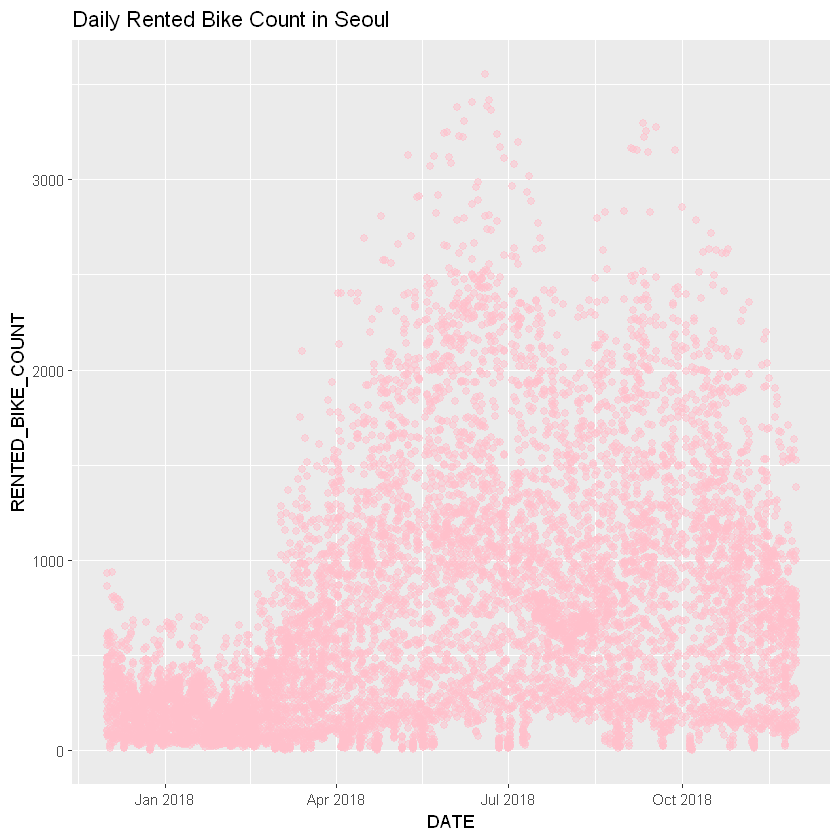

In [81]:
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT)) +
  geom_point(color = "pink",  alpha = 0.5, size = 2) +
  labs(title = "Daily Rented Bike Count in Seoul") +
  theme(legend.position = "none")

We can see the rented bike count start to increase around FEB/March and reach the max on June then decrease little bit towards AUG then increase around SEP and then start decreasing again towards the end of the year

#### Task 11 - Create the same plot of the RENTED_BIKE_COUNT time series, but now add HOURS as the colour.

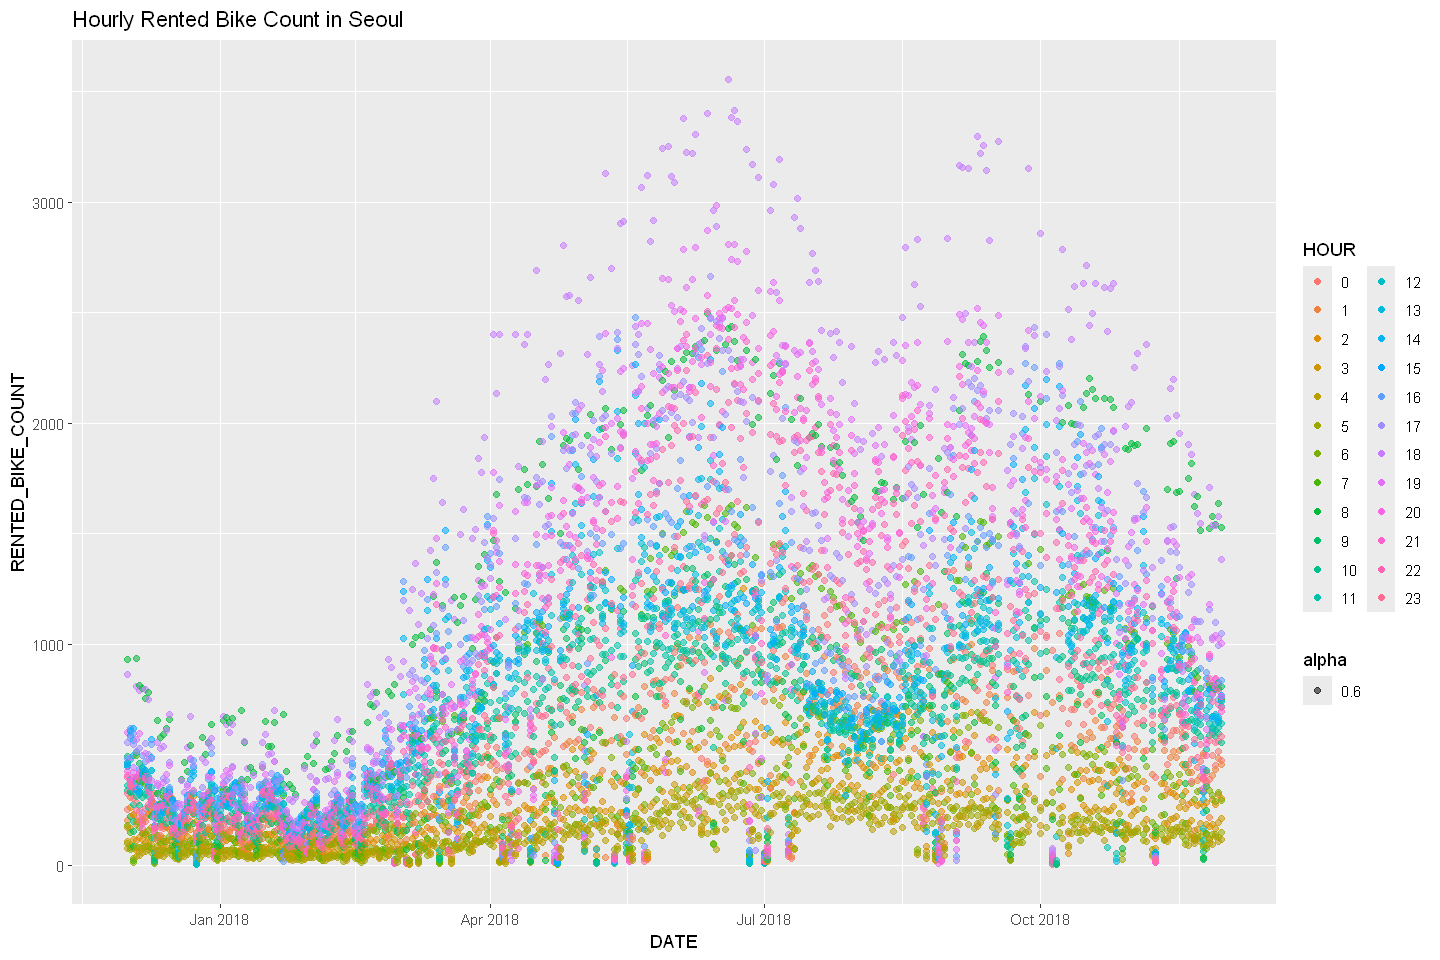

In [82]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(seoul_bike_sharing, aes(x = DATE, y = RENTED_BIKE_COUNT, color = HOUR, alpha = 0.6)) +
  geom_point() +
  labs(title = "Hourly Rented Bike Count in Seoul")

We can see the rented bike count are to low at the dawn and start to increase slowly during the early hours of the morning to reach to max at the evening in 6 or 7 then start decreasing again.


#### Task 12 - Create a histogram overlaid with a kernel density curve
Normalize the histogram so the y axis represents ‘density’. This can be done by setting y=..density.. in the aesthetics of the histogram.

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


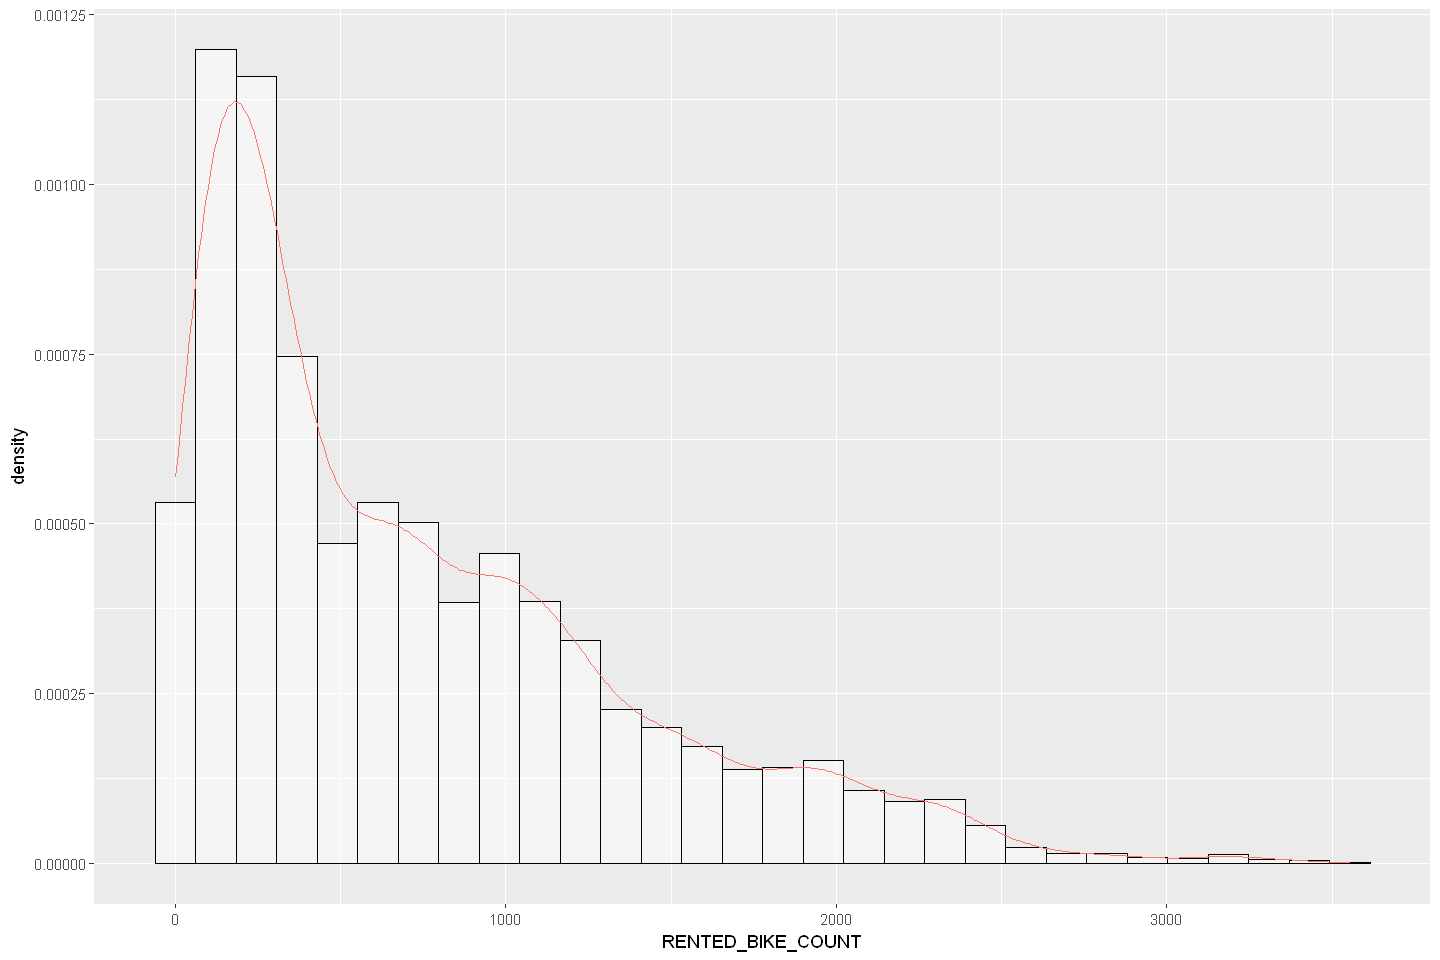

In [83]:
ggplot(seoul_bike_sharing, aes(x = RENTED_BIKE_COUNT)) +
  geom_histogram(aes(y = ..density..),
    colour = 1, fill = "white", alpha = 0.5
  ) +
  geom_density(aes(color = "blue")) +
  theme(legend.position = "none")

We can clearly see that on most days the number of rented bikes are around 125-375 and only in rare occasions we see the number goes above 2500.

#### Task 13: Use a scatter plot to visualize the correlation between RENTED_BIKE_COUNT and TEMPERATURE by SEASONS, Use HOUR as the color.

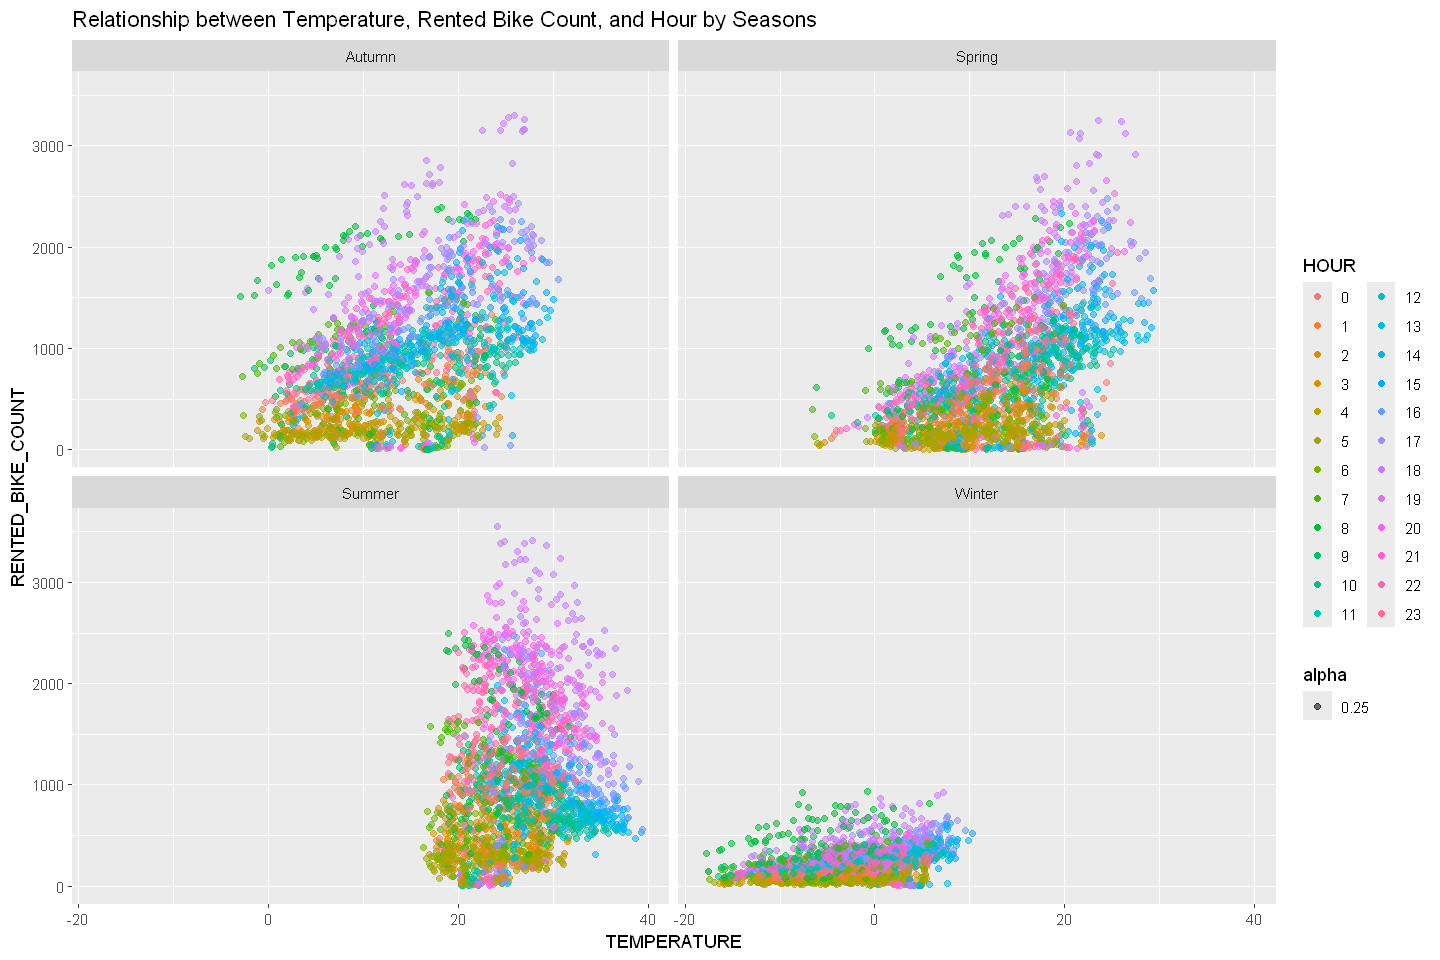

In [84]:
ggplot(seoul_bike_sharing, aes(x = TEMPERATURE, y = RENTED_BIKE_COUNT, color = HOUR, alpha = 0.25)) +
  geom_point() +
  facet_wrap(~SEASONS) +
  labs(title = "Relationship between Temperature, Rented Bike Count, and Hour by Seasons")  # Adding a title


This is a very interesting plot, we can see that in Autumn and spring where the temperature is almost similar between 0 to 20, people tend to use the bikes in the same hours and the counts of bikes is very similar, in general people tend to use more bikes on warmer weather.
However in summer we can see that people still use the bikes on the same hours, however the count of bikes become less when the weather become hotter.
In Winter we can see that there is a huge drop in the number of bikes rented with a maximum limit of 1000 bikes, also people tend to use the bikes more in early morning and evening around 6-7.

#### Task 14 - Create a display of four boxplots of RENTED_BIKE_COUNT vs. HOUR grouped by SEASONS.
Use facet_wrap to generate four plots corresponding to the seasons

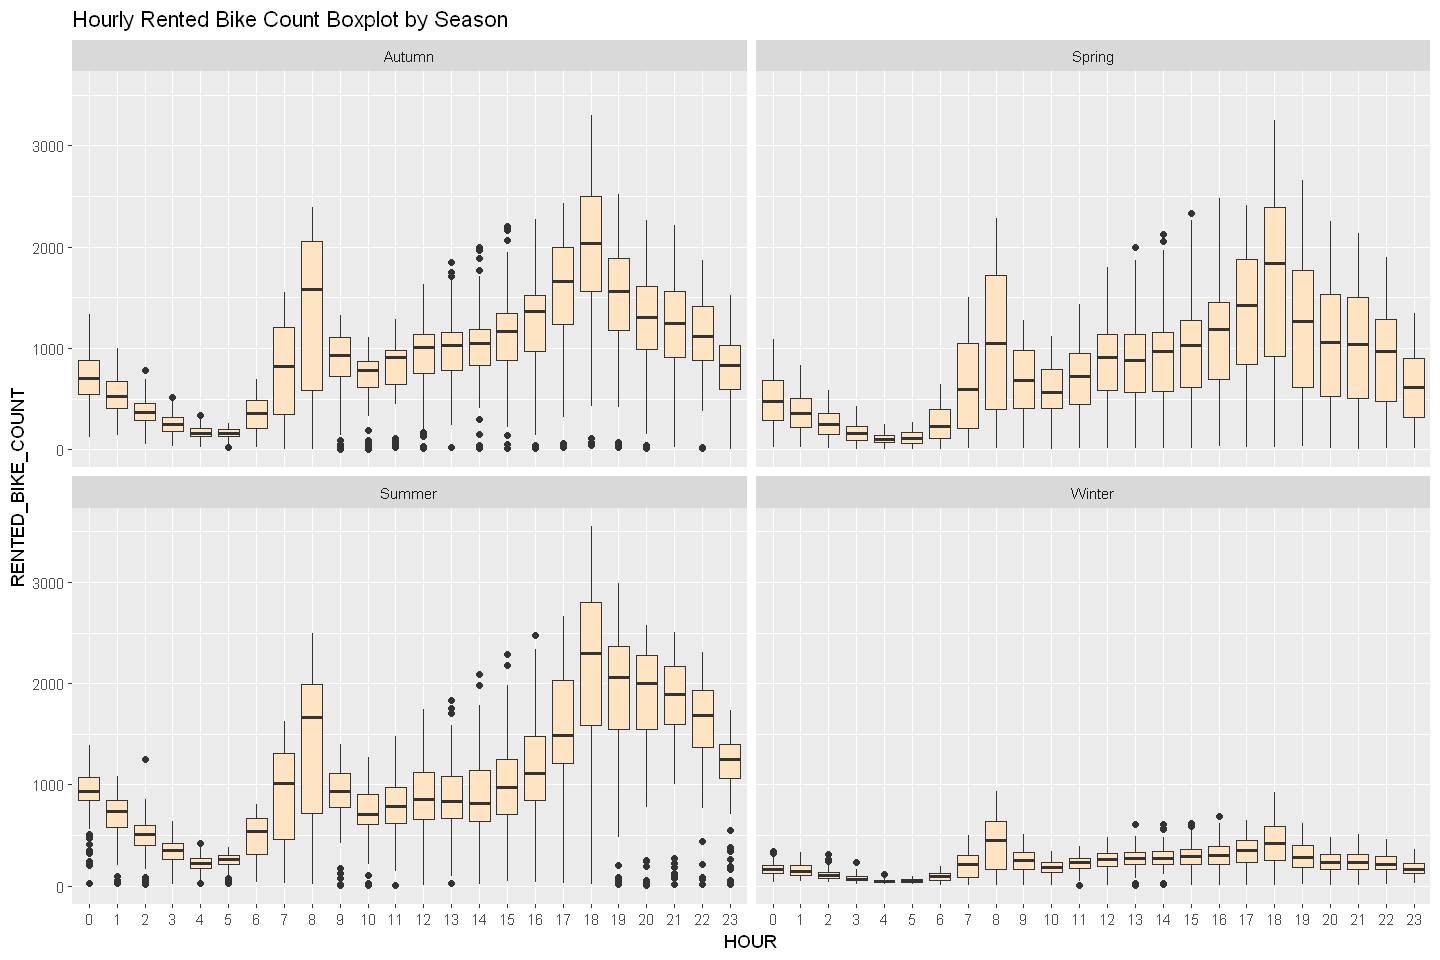

In [85]:
ggplot(seoul_bike_sharing, aes(x = HOUR, y = RENTED_BIKE_COUNT)) +
  geom_boxplot(fill = "bisque") +
  facet_wrap(~SEASONS) +
  labs(title = "Hourly Rented Bike Count Boxplot by Season")

We can see here that there is many Outliers in our data sets for the count of bikes during hours in different season. In general people tends to use the bikes in the same times during the different seasons with slightly different counts expect in Winter were there is a huge drop in the number of bikes being rented.

#### Task 15 - Group the data by DATE, and use the summarize() function to calculate the daily total rainfall and snowfall

In [86]:
seoul_bike_sharing %>%
  group_by(DATE) %>%
  summarise(daily_rainfall = sum(RAINFALL), daily_snowfall = sum(SNOWFALL))%>%slice(1:10)

DATE,daily_rainfall,daily_snowfall
<date>,<dbl>,<dbl>
2017-12-01,0.0,0.0
2017-12-02,0.0,0.0
2017-12-03,4.0,0.0
2017-12-04,0.1,0.0
2017-12-05,0.0,0.0
2017-12-06,1.3,8.6
2017-12-07,0.0,10.4
2017-12-08,0.0,0.0
2017-12-09,0.0,0.0


##### We can plot the above results as per the below:

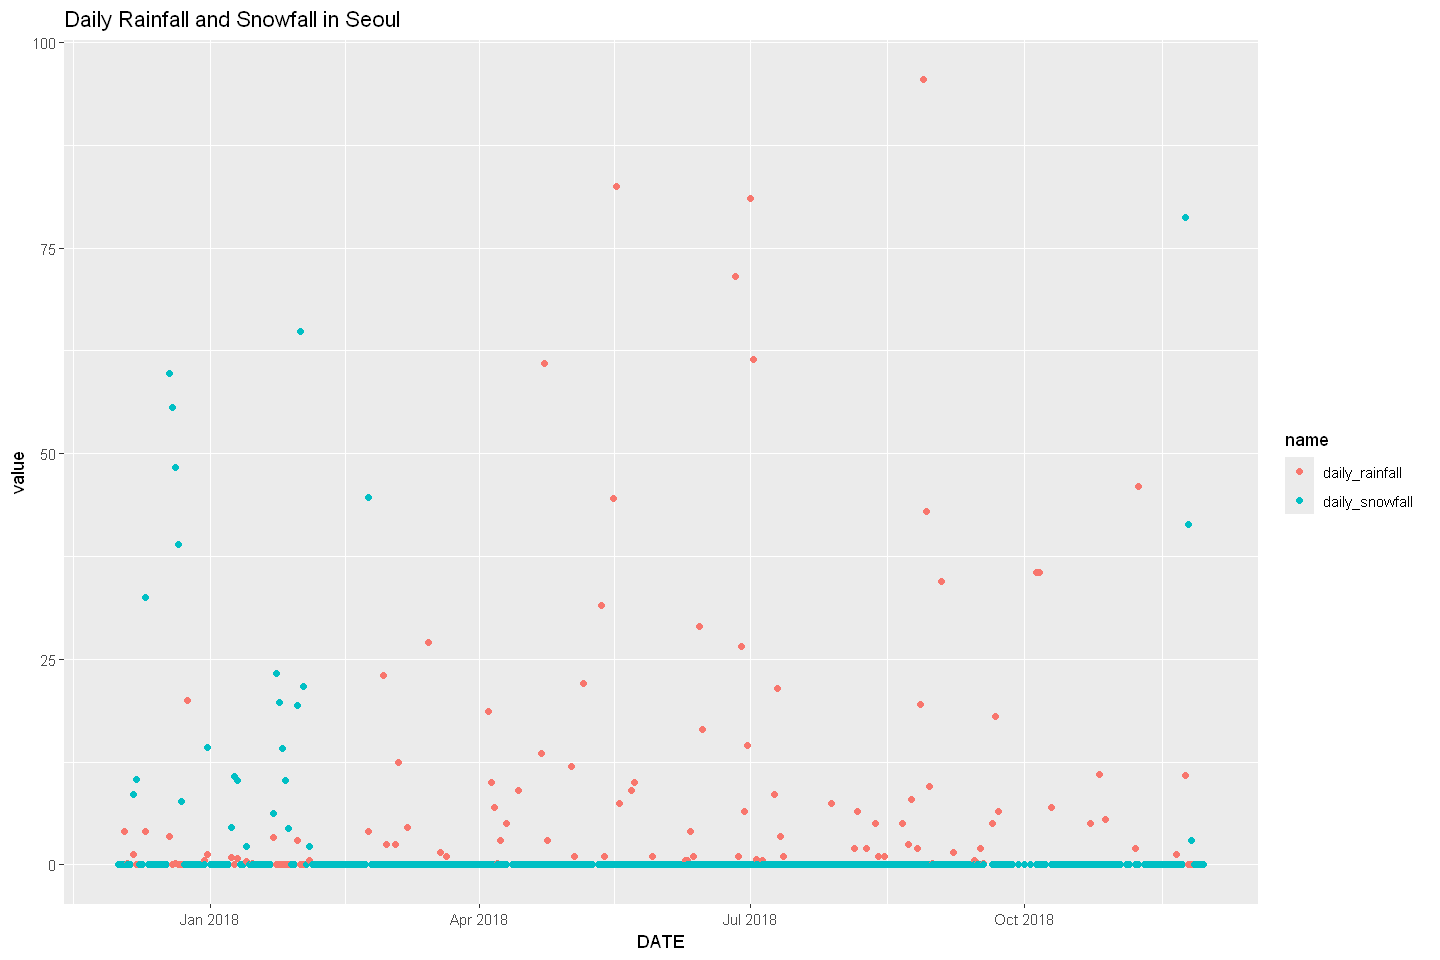

In [87]:
seoul_bike_sharing %>% group_by (DATE) %>% summarize(daily_rainfall = sum(RAINFALL), daily_snowfall = sum(SNOWFALL))%>%
    pivot_longer(!DATE) %>%
    ggplot()+
    geom_point(aes(x = DATE, y = value, color = name))+
labs(title = "Daily Rainfall and Snowfall in Seoul")

#### Task 16 - Determine how many days had snowfall

In [88]:
seoul_bike_sharing %>%
  group_by(DATE) %>%
  summarise(daily_snowfall = sum(SNOWFALL)) %>%
  filter(daily_snowfall > 0) %>%
  count()%>% summarize( Total_Snowfall_days = n)

Total_Snowfall_days
<int>
27


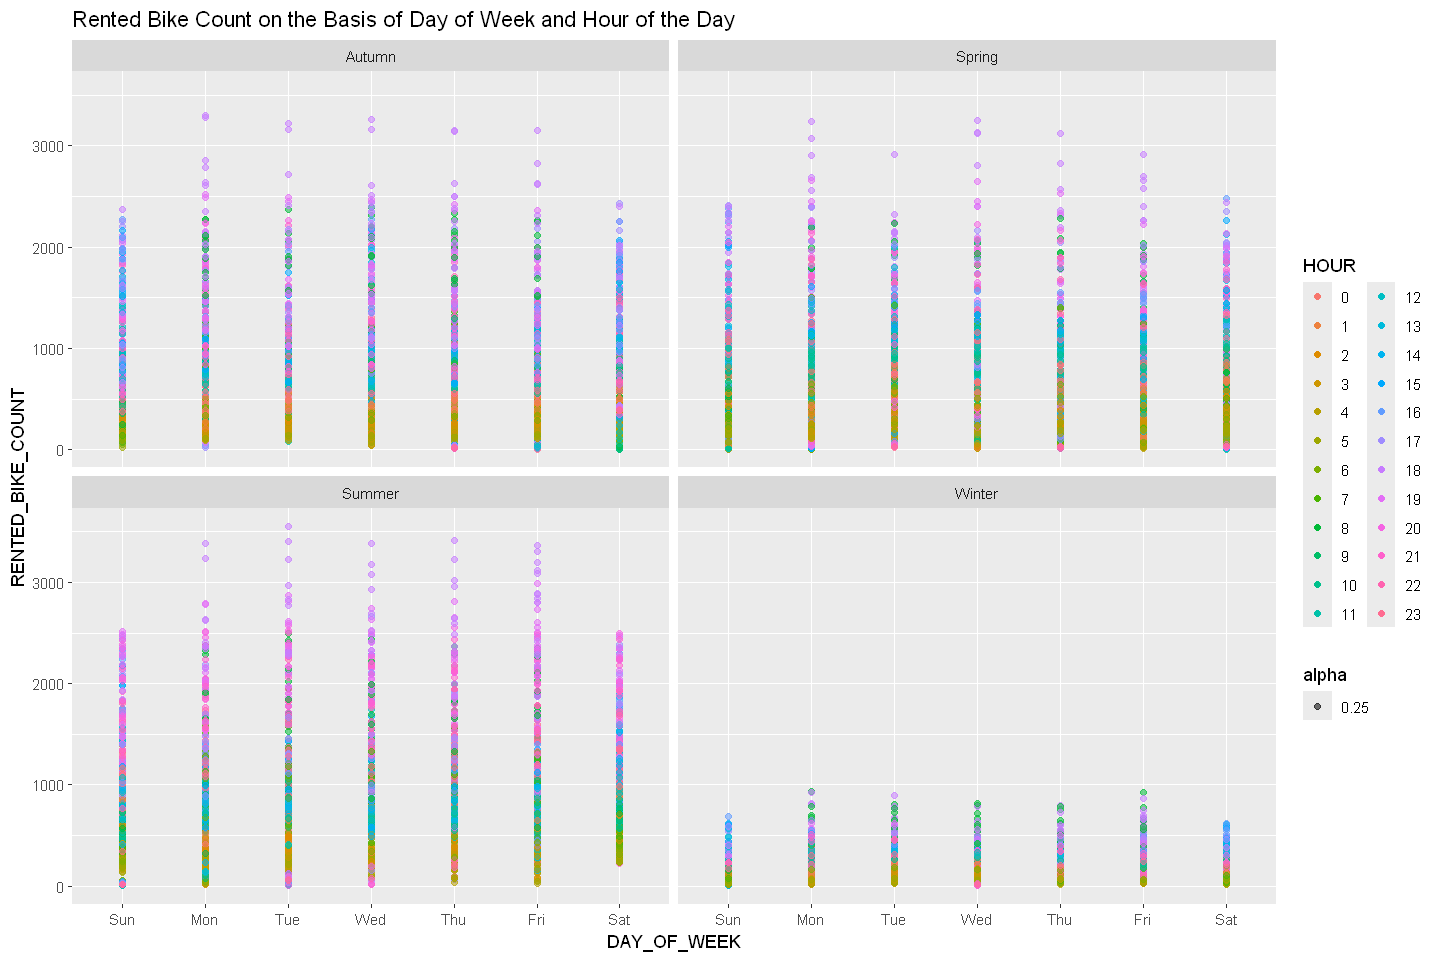

In [89]:
# In addition to the mentioned tasks we can creat a visualization to show bike count depending on the day of the week.
seoul_bike_sharing %>%
  mutate(DAY_OF_WEEK = as.factor(wday(DATE, abbr = TRUE, label = TRUE))) %>%
  ggplot(aes(x = DAY_OF_WEEK, y = RENTED_BIKE_COUNT, color = HOUR, alpha = 0.25)) +
  geom_point() +
  facet_wrap(~SEASONS)+
  labs(title = "Rented Bike Count on the Basis of Day of Week and Hour of the Day")

We can see the count of bikes is higher on weekdays than on weekends, which suggests that some users are using bikes on weekdays as commute to work, also on weekends on Winter and Autumn count of bikes peaks around 12-16 which is not usual on other days.

<span style="background-color:pink; color:black; font-size:26px; font-weight:bold"> Predict Bike-sharing Demand using Regression Models</span>   
Predict Hourly Rented Bike Count using Basic Linear Regression Models:
- TASK: Split data into training and testing datasets
- TASK: Build a linear regression model using only the weather variables
- TASK: Build a linear regression model using both weather and date/time * variables
- TASK: Evaluate the models and identify important variables
  
Refine the Baseline Regression Models:
- TASK: Add higher order terms
- TASK: Add interaction terms
- TASK: Add regularization
- TASK: Experiment to find the best performed model
  
Building a Baseline Regression Model:   
The seoul_bike_sharing_converted_normalized.csv will be our main dataset which has following variables:

The response variable: 
- RENTED BIKE COUNT- Count of bikes rented at each hour

Weather predictor variables:
- TEMPERATURE - Temperature in Celsius 
- HUMIDITY - Unit is % 
- WIND_SPEED - Unit is m/s 
- VISIBILITY - Multiplied by 10m 
- DEW_POINT_TEMPERATURE - The temperature to which the air would have to cool down in order to reach saturation, unit is Celsius
- SOLAR_RADIATION - MJ/m2
- RAINFALL - mm SNOWFALL - cm

Date/time predictor variables:
- HOUR- Hour of the day
- HOLIDAY - Holiday/No_holiday
- SEASONS - Winter, Spring, Summer, Autumn      
Now we will load the datasets. We will remove FUNCTIONING_DAY column as it has only one value.

### Predict Hourly Rented Bike Count using Basic Linear Regression Models:

In [91]:
library(rlang)
library(tidymodels)

In [92]:
bike_sharing_df <- read_csv("seoul_bike_sharing_converted_normalized.csv")

Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [93]:
#remove DATE and FUNCTIONING_DAY columns as it act as index value and has only one value respectively.
bike_sharing_df <- bike_sharing_df %>% 
                   select(-DATE, -FUNCTIONING_DAY)

#### TASK: Split training and testing data
_TODO_: Use the initial_split(), training(), and testing() functions to generate a training dataset consisting of 75% of the original dataset, and a testing dataset using the remaining 25%.


In [94]:
# Use the `initial_split()`, `training()`, and `testing()` functions to split the dataset with seed 1234
set.seed(1234)
bike_sharing_split <- initial_split(bike_sharing_df, prop = 0.75)
bike_sharing_training <- training(bike_sharing_split)
bike_sharing_testing <- testing(bike_sharing_split)

#### TASK: Build a linear regression model using weather variables only

In [95]:
# Use `linear_reg()` with engine `lm` and mode `regression`
lm_model_weather <- linear_reg(mode = "regression", engine = "lm")
# Fit the model called `lm_model_weather`
training_fit <- lm_model_weather %>%
  fit(RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL, 
      data = bike_sharing_training)
# print(lm_model_weather$fit)
print(training_fit)

parsnip model object


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + 
    WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
    RAINFALL + SNOWFALL, data = data)

Coefficients:
          (Intercept)            TEMPERATURE               HUMIDITY  
             0.043532               0.675221              -0.258408  
           WIND_SPEED             VISIBILITY  DEW_POINT_TEMPERATURE  
             0.113806               0.003533              -0.089172  
      SOLAR_RADIATION               RAINFALL               SNOWFALL  
            -0.125170              -0.496346               0.089414  



#### TASK: Build a linear regression model using all variables

In [96]:
lm_model_all <- linear_reg(mode = "regression", engine = "lm")
all_fit <- lm_model_all %>%
  fit(RENTED_BIKE_COUNT ~ ., data = bike_sharing_training)
print(all_fit)

parsnip model object


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ ., data = data)

Coefficients:
          (Intercept)            TEMPERATURE               HUMIDITY  
             0.059144               0.220219              -0.249502  
           WIND_SPEED             VISIBILITY  DEW_POINT_TEMPERATURE  
             0.008979               0.006154               0.168370  
      SOLAR_RADIATION               RAINFALL               SNOWFALL  
             0.077907              -0.580933               0.073431  
               AUTUMN                 SPRING                 SUMMER  
             0.101013               0.053845               0.055752  
               WINTER                HOLIDAY             NO_HOLIDAY  
                   NA              -0.035009                     NA  
                  `0`                    `1`                   `10`  
            -0.008244              -0.032878              -0.066831  
                 `11`                   `12`                

#### TASK: Model evaluation and identification of important variables
Make predictions on the testing dataset using both lm_model_weather and lm_model_all models

In [97]:
weather_train_results <- training_fit %>% predict(new_data = bike_sharing_testing)
all_train_results <- all_fit %>% predict(new_data = bike_sharing_testing)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
"prediction from rank-deficient fit; consider predict(., rankdeficient="NA")"


In [98]:
# generate two test results dataframe with a truth column:
weather_train_results <- weather_train_results %>% mutate(truth = bike_sharing_testing$RENTED_BIKE_COUNT)
all_train_results <- all_train_results %>% mutate(truth = bike_sharing_testing$RENTED_BIKE_COUNT)

In [99]:
# test_results_weather for lm_model_weather model
head(weather_train_results)

.pred,truth
<dbl>,<dbl>
0.088784687,0.02757456
0.089855791,0.05036579
0.166318422,0.10073157
0.098275701,0.15559932
0.038486907,0.16826111
0.004248586,0.11339336


In [100]:
# test_results_all for lm_model_all
head(all_train_results)

.pred,truth
<dbl>,<dbl>
-0.05058647,0.02757456
-0.00421153,0.05036579
0.06130900,0.10073157
0.14913147,0.15559932
0.16595024,0.16826111
0.12882774,0.11339336


In [101]:
# Use rsq() and rmse() functions to calculate R-squared and RMSE metrics for the two test results
rsq_weather <- rsq(weather_train_results, truth = truth, estimate = .pred)
rsq_all <- rsq(all_train_results, truth = truth, estimate = .pred)

rmse_weather <- rmse(weather_train_results, truth = truth, estimate = .pred)
rmse_all <- rmse(all_train_results, truth = truth, estimate = .pred)
rsq_weather

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.438866


In [102]:
rsq_all

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6690204


In [103]:
rmse_weather

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.1335466


In [104]:
rmse_all

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.102539


From results we find that lm_model_all is much better.

In [105]:
# find the variables with the highest coefficients that contributed the most to the prediction.
all_fit %>% tidy() %>% arrange(desc(abs(estimate)))

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
RAINFALL,-0.580933467,0.040313966,-14.4102287,2.412217e-46
HUMIDITY,-0.249502048,0.027994448,-8.9125546,6.429410e-19
`18`,0.223636227,0.009571893,23.3638455,7.319744e-116
TEMPERATURE,0.220218872,0.059687420,3.6895358,2.265545e-04
DEW_POINT_TEMPERATURE,0.168370079,0.062287268,2.7031219,6.887546e-03
`19`,0.147154816,0.009638425,15.2675161,1.047191e-51
`8`,0.126892947,0.009179591,13.8233763,7.717664e-43
`21`,0.125655749,0.009592292,13.0996581,1.053960e-38
`20`,0.121551839,0.009603538,12.6569859,2.816103e-36


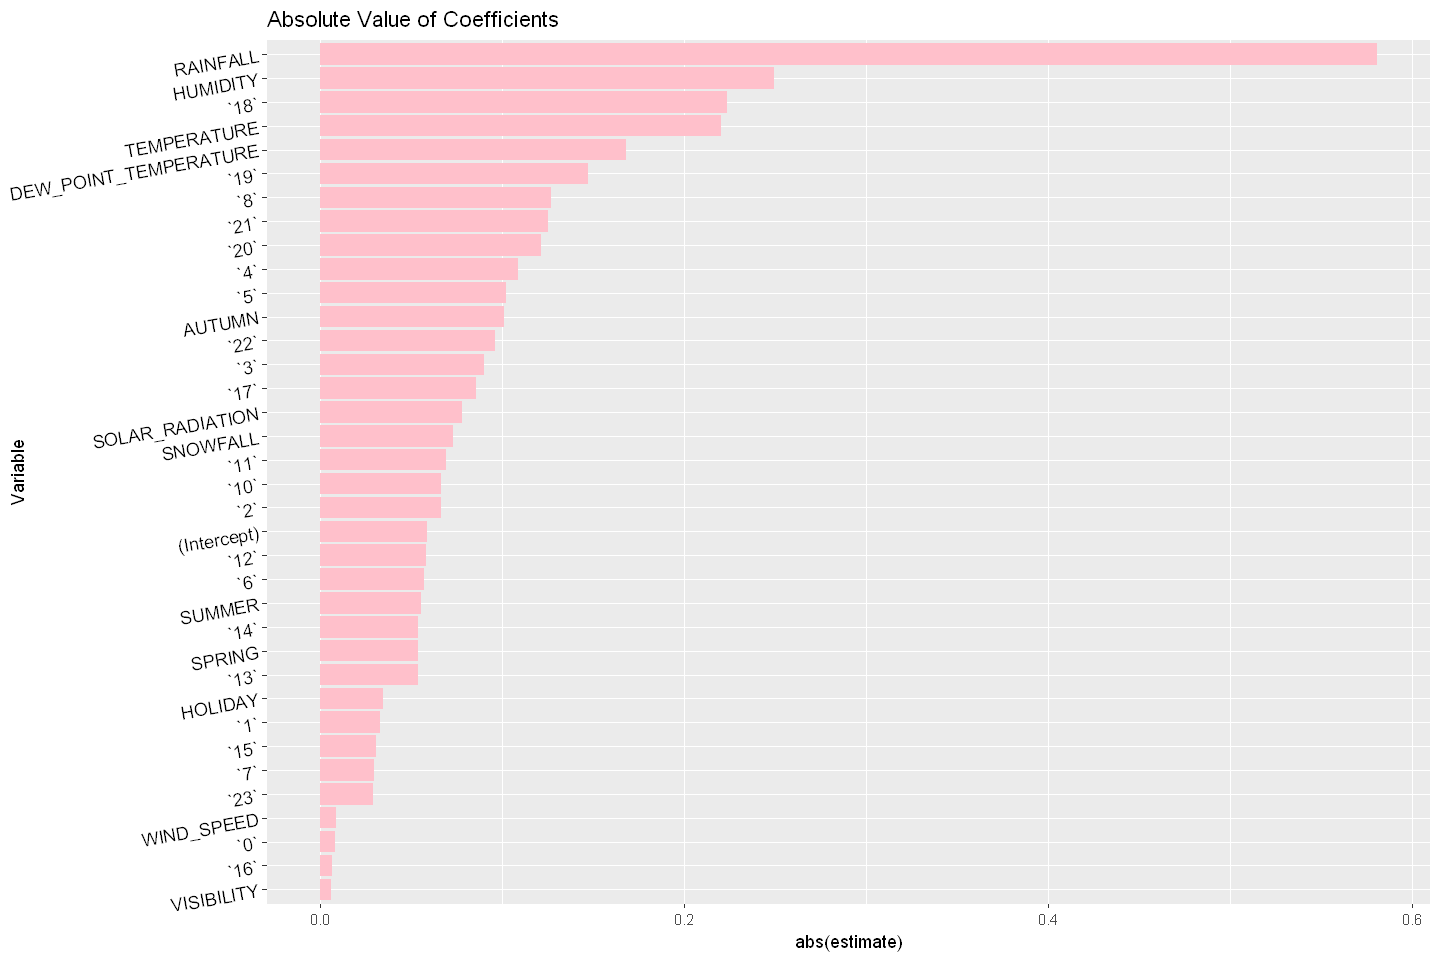

In [106]:
# Sort the coefficient list in descending order and visualize the result using ggplot and geom_bar
# Set plot size
options(repr.plot.width=12, repr.plot.height=8)
# Plotting code
all_fit %>% tidy() %>% filter(!is.na(estimate)) %>%
  ggplot(aes(x = fct_reorder(term, abs(estimate)), y = abs(estimate))) +
  geom_bar(stat = "identity", fill = "pink") +
  coord_flip() +
  ggtitle("Absolute Value of Coefficients") +  # Add title
  theme(axis.text.y = element_text(angle = 10, color = "black", size = 11)) +
  xlab("Variable")

### Refine the Baseline Regression Models:
#### TASK: Add polynomial terms
Linear regression models are the most suitable models to capture the linear correlations among variables. However, in real world data, many relationships may be non-linear.

For example, the correlation between RENTED_BIKE_COUNT and TEMPERATURE does not look like linear:



`geom_smooth()` using formula = 'y ~ x'


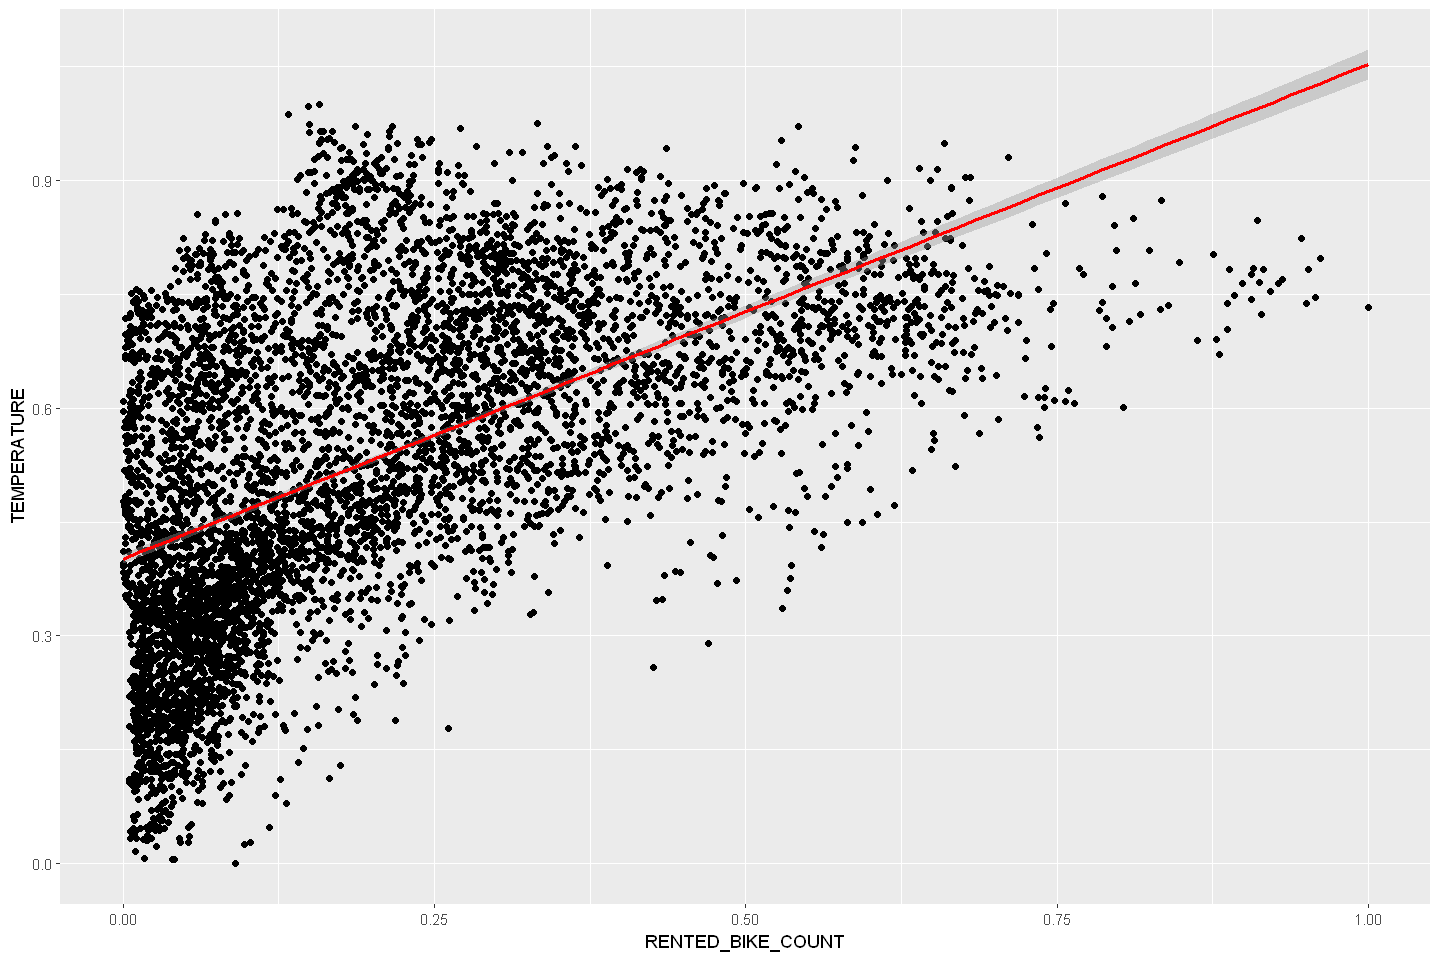

In [107]:
ggplot(bike_sharing_training, aes(RENTED_BIKE_COUNT, TEMPERATURE)) +
  geom_point() +
  geom_smooth(method = "lm", color = "RED")

One solution to handle such nonlinearity is using polynomial regression by adding polynomial terms. Higher order polynomials are better than the first order polynomial.

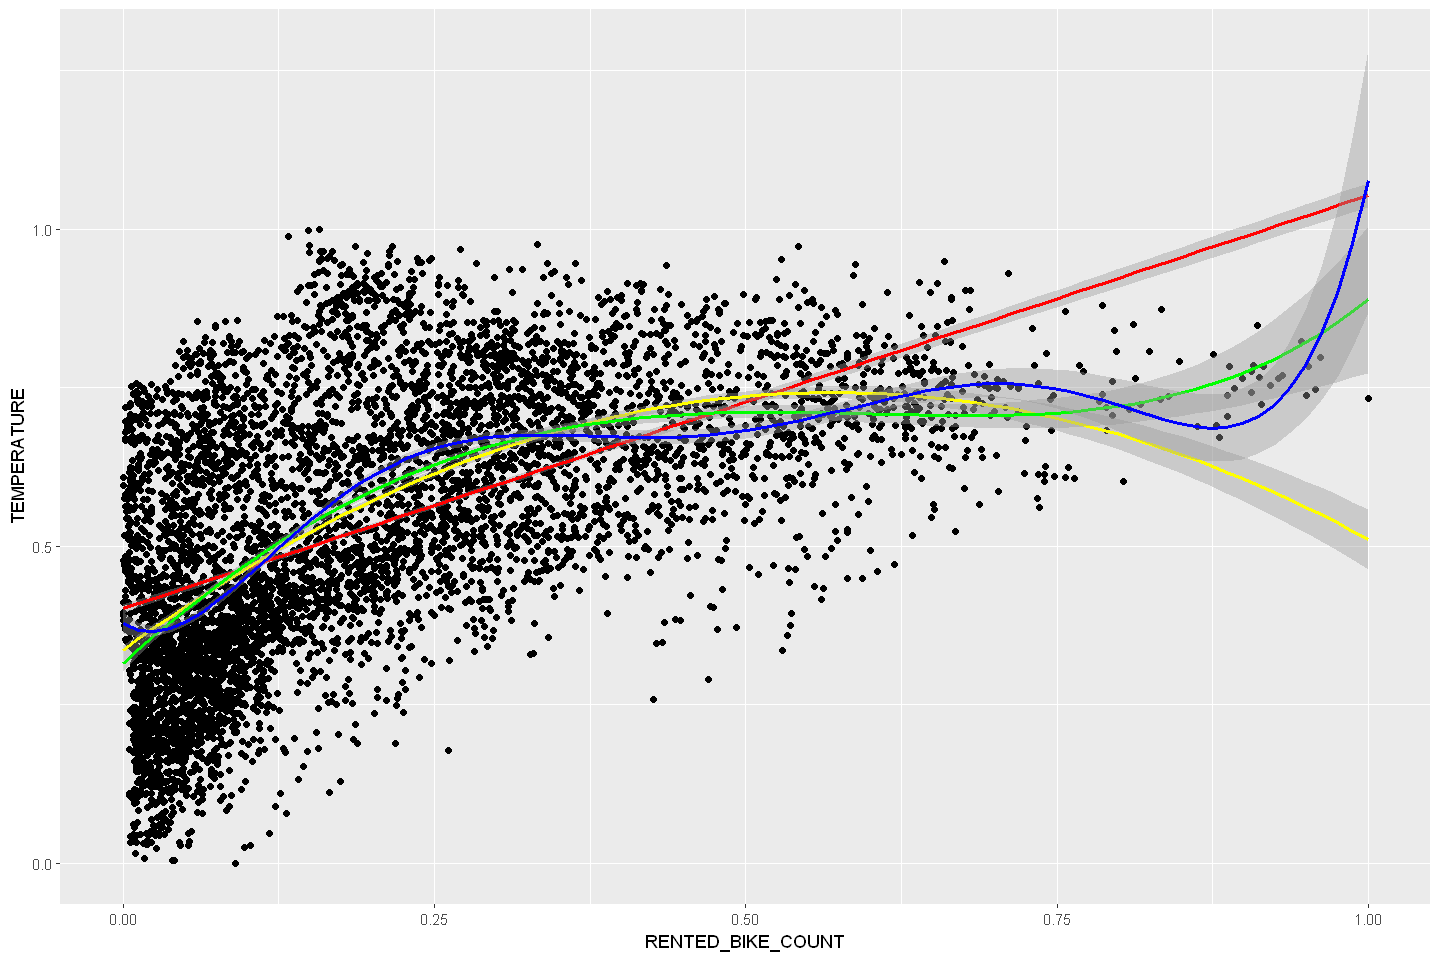

In [108]:
# Plot the higher order polynomial fits
ggplot(bike_sharing_training, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), color = "yellow") +
  geom_smooth(method = "lm", formula = y ~ poly(x, 4), color = "green") +
  geom_smooth(method = "lm", formula = y ~ poly(x, 6), color = "blue")

##### Fit a linear regression model lm_poly with higher order polynomial terms on the important variables (larger coefficients) found in the baseline model

In [109]:
lm_poly <- linear_reg(mode = "regression", engine = "lm") %>%
  fit(RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 6) + poly(HUMIDITY, 6) + poly(DEW_POINT_TEMPERATURE, 4), data = bike_sharing_training)
summary(lm_poly$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 
    6) + poly(HUMIDITY, 6) + poly(DEW_POINT_TEMPERATURE, 4), 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44191 -0.05668  0.00153  0.05221  0.40859 

Coefficients: (6 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.0467508  0.0233009   2.006  0.04486 *  
TEMPERATURE                      0.5590528  0.1348620   4.145 3.44e-05 ***
HUMIDITY                        -0.1066547  0.0642850  -1.659  0.09715 .  
WIND_SPEED                       0.0031707  0.0101624   0.312  0.75505    
VISIBILITY                      -0.0081387  0.0053278  -1.528  0.12667    
DEW_POINT_TEMPERATURE           -0.2358434  0.1479894  -1.594  0.11106    
SOLAR_RADIATION                  0.0003396  0.0112372   0.030  0.97589    
RAINFALL                        -0.3428396  0.0387976  -8.837  < 2e-16 ***
SNOWFALL        

In [110]:
# Use predict() function to generate test results for `lm_poly`
lm_ploy_train_results <- lm_poly %>%
  predict(new_data = bike_sharing_testing) %>%
  mutate(truth = bike_sharing_testing$RENTED_BIKE_COUNT)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
"prediction from rank-deficient fit; consider predict(., rankdeficient="NA")"


In [111]:
head(lm_ploy_train_results)

.pred,truth
<dbl>,<dbl>
-0.069021894,0.02757456
-0.027523284,0.05036579
0.001182216,0.10073157
0.170961492,0.15559932
0.208015984,0.16826111
0.162654985,0.11339336


A common practice is to filter the results and see if we have any negative results.

In [112]:
lm_ploy_train_results %>% filter(lm_ploy_train_results$.pred < 0)

.pred,truth
<dbl>,<dbl>
-0.069021894,0.027574564
-0.027523284,0.050365785
-0.046896230,0.046426562
-0.040638501,0.008441193
-0.023978938,0.076252110
-0.068964497,0.017726505
-0.078587440,0.011254924
-0.046993061,0.023916714
-0.004474390,0.039392234


Another minor improvement we could do here is to convert all negative prediction results to zero, because we can not have negative rented bike counts.

In [113]:
lm_ploy_train_results$.pred <- replace(lm_ploy_train_results$.pred, lm_ploy_train_results$.pred < 0, 0)

In [114]:
# Calculate R-squared and RMSE from the test results
rsq_lm_ploy <- rsq(lm_ploy_train_results, truth = truth, estimate = .pred)
rmse_lm_ploy <- rmse(lm_ploy_train_results, truth = truth, estimate = .pred )
rsq_lm_ploy
rmse_lm_ploy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.7560137


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.08840232


There is an improvement in both RSQ and RMSQ metrics than All linear model.

#### TASK: Add interaction terms
In real-world scenarios, in addition to non-linear relationships between response variables and predictor variables, you may also encounter relationships among variables called interaction effects.             
For example, the effect of predictor variable TEMPERATURE on RENTED_BIKE_COUNT may also depend on other variables such as HUMIDITY, RAINFALL, or both (they interact) and the effect of SEASON on RENTED_BIKE_COUNT may also depend on HOLIDAY, HOUR, or both.

In [115]:
# Add interaction terms to the poly regression built in previous step
lm_poly <- linear_reg(mode = "regression", engine = "lm") %>%
  fit(RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 6) + poly(HUMIDITY, 6) + poly(DEW_POINT_TEMPERATURE, 4) + RAINFALL * HUMIDITY + HUMIDITY * TEMPERATURE 
      + AUTUMN * HOLIDAY + AUTUMN * `18` + AUTUMN * `19` + AUTUMN * `8`, data = bike_sharing_training)

# create test results
lm_ploy_train_results <- lm_poly %>% predict(new_data = bike_sharing_testing) %>% mutate(truth = bike_sharing_testing$RENTED_BIKE_COUNT)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
"prediction from rank-deficient fit; consider predict(., rankdeficient="NA")"


In [116]:
head(lm_ploy_train_results)

.pred,truth
<dbl>,<dbl>
-0.072174973,0.02757456
-0.029769576,0.05036579
0.009291779,0.10073157
0.159905600,0.15559932
0.218835012,0.16826111
0.188997657,0.11339336


In [117]:
summary(lm_poly$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 
    6) + poly(HUMIDITY, 6) + poly(DEW_POINT_TEMPERATURE, 4) + 
    RAINFALL * HUMIDITY + HUMIDITY * TEMPERATURE + AUTUMN * HOLIDAY + 
    AUTUMN * `18` + AUTUMN * `19` + AUTUMN * `8`, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41489 -0.05576  0.00173  0.05107  0.41942 

Coefficients: (6 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -0.549848   0.066463  -8.273  < 2e-16 ***
TEMPERATURE                       1.819684   0.189917   9.581  < 2e-16 ***
HUMIDITY                          1.063231   0.138860   7.657 2.19e-14 ***
WIND_SPEED                        0.005198   0.010027   0.518  0.60424    
VISIBILITY                       -0.005023   0.005258  -0.955  0.33941    
DEW_POINT_TEMPERATURE            -0.288932   0.146231  -1.976  0.04821 *  
SOLAR_RADIATION                  -0.005356   0.0

In [118]:
# check if there is negative results
lm_ploy_train_results %>% filter(lm_ploy_train_results$.pred < 0)

.pred,truth
<dbl>,<dbl>
-0.072174973,0.027574564
-0.029769576,0.050365785
-0.006082781,0.046426562
-0.037028749,0.008441193
-0.011348510,0.076252110
-0.052550873,0.017726505
-0.080393729,0.011254924
-0.002706971,0.093415869
-0.021031145,0.023916714


In [119]:
# assign zero value for negitave results
lm_ploy_train_results$.pred <- replace(lm_ploy_train_results$.pred, lm_ploy_train_results$.pred < 0, 0)
# Calculate R-squared and RMSE from the test results
rsq_lm_ploy <- rsq(lm_ploy_train_results, truth = truth, estimate = .pred)
rsq_lm_ploy
rmse_lm_ploy <- rmse(lm_ploy_train_results, truth = truth, estimate = .pred)
rmse_lm_ploy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.7612214


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.08736645


We can see an improvement in both metrics.

#### TASK: Add regularization
TODO: Define a linear regression model specification glmnet_spec using glmnet engine.We will use linear_reg() function with two parameters: penalty and mixture, penalty controls the intensity of model regularization and mixture controls the tradeoff between L1 and L2 regularizations It could manually try different parameter combinations or use grid search to find optimal combinations

In [121]:
library(glmnet)

In [122]:
# first we create a formula recipe
lm_glmnet_formula <- formula(RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 6) + poly(HUMIDITY, 6) + poly(DEW_POINT_TEMPERATURE, 4) + RAINFALL * HUMIDITY 
                             + HUMIDITY * TEMPERATURE + AUTUMN * HOLIDAY + AUTUMN * `18` + AUTUMN * `19` + AUTUMN * `8`)
# k-fold cross-validation
folds <- vfold_cv(bike_sharing_training, v = 10)
# define model
tune_spec <- linear_reg(penalty = tune(), mixture = tune()) %>% set_engine("glmnet")
# Grid workflow
wf <- workflow() %>% add_formula(lm_glmnet_formula)
# Define tuning values
lambda_tune <- grid_regular(levels = 50, penalty(range = c(-3, 0.3)))
mixture_tune <- grid_regular(levels = 50, mixture(range = c(0, 1)))
mix_grid <- as.data.frame(c(lambda_tune, mixture_tune))
# define grid search
grid <- tune_grid(wf %>% add_model(tune_spec), resamples = folds, grid = mix_grid)

→ A | warning: A correlation computation is required, but `estimate` is constant and has 0 standard deviation, resulting in a divide
               by 0 error. `NA` will be returned.

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x4
There were issues with some computations   A: x5
There were issues with some computations   A: x6
There were issues with some computations   A: x7
There were issues with some computations   A: x8
There were issues with some computations   A: x9
There were issues with some computations   A: x10
There were issues with some computations   A: x10




In [123]:
# print grid search results
show_best(grid, metric = "rmse")

penalty,mixture,.metric,.estimator,mean,n,std_err,.config
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
0.001167742,0.02040816,rmse,standard,0.09385752,10,0.0006509078,Preprocessor1_Model02
0.001363622,0.04081633,rmse,standard,0.09387579,10,0.0006505374,Preprocessor1_Model03
0.001592358,0.06122449,rmse,standard,0.09389001,10,0.0006509607,Preprocessor1_Model04
0.001859464,0.08163265,rmse,standard,0.09390729,10,0.0006514457,Preprocessor1_Model05
0.002171374,0.10204082,rmse,standard,0.09393273,10,0.0006522052,Preprocessor1_Model06


From the above grid search we will be using penalty of 0.001167742 and mixture of 0.02040816 as best result.

In [124]:
lm_glmnet <- linear_reg(mode = "regression", engine = "glmnet", penalty = 0.001167742, mixture = 0.02040816) %>%
  fit(RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 6) + poly(HUMIDITY, 6) + poly(DEW_POINT_TEMPERATURE, 4) + RAINFALL * HUMIDITY + 
      HUMIDITY * TEMPERATURE + AUTUMN * HOLIDAY + AUTUMN * `18` + AUTUMN * `19` + AUTUMN * `8`, data = bike_sharing_training)

In [125]:
# Test results
lm_glmnet_train_results <- lm_glmnet %>% predict(new_data = bike_sharing_testing) %>% mutate(truth = bike_sharing_testing$RENTED_BIKE_COUNT)
head(lm_glmnet_train_results)

.pred,truth
<dbl>,<dbl>
-0.068574413,0.02757456
-0.026087836,0.05036579
0.003958408,0.10073157
0.171152858,0.15559932
0.201713902,0.16826111
0.163934973,0.11339336


In [126]:
# check if there is negative results
lm_glmnet_train_results %>% filter(lm_glmnet_train_results$.pred < 0)

.pred,truth
<dbl>,<dbl>
-0.0685744134,0.027574564
-0.0260878364,0.050365785
-0.0435743859,0.046426562
-0.0396843036,0.008441193
-0.0238448831,0.076252110
-0.0672848493,0.017726505
-0.0769215615,0.011254924
-0.0445069753,0.023916714
-0.0016568560,0.039392234


In [127]:
# assign zero value for negitave results
lm_glmnet_train_results$.pred <- replace(lm_glmnet_train_results$.pred, lm_glmnet_train_results$.pred < 0, 0)

In [128]:
# Calculate R-squared and RMSE from the test results
rsq_lm_glmnet <- rsq(lm_glmnet_train_results, truth = truth, estimate = .pred)
rsq_lm_glmnet
rmse_lm_glmnet <- rmse(lm_glmnet_train_results, truth = truth, estimate = .pred)
rmse_lm_glmnet

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.7601592


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.08763657


We don’t see any improvement in the model, it is slightly worse than the model we created in last step.

### TASK: Experiment to search for improved models
Experiment by building and testing at least five different models. For each of your experiments, include polynomial terms, interaction terms, and one of the three regularization introduced. Before starting building model, start with matrix to understand the relationship between the different varibale and the target variable.

In [129]:
bike_sharing_df_cor <- cor(bike_sharing_df, method = "pearson", use = "pairwise.complete.obs")
bike_sharing_df_cor[, 1]

RENTED_BIKE_COUNT           TEMPERATURE              HUMIDITY 
          1.000000000           0.562809687          -0.201972670 
           WIND_SPEED            VISIBILITY DEW_POINT_TEMPERATURE 
          0.125021946           0.212322776           0.400262829 
      SOLAR_RADIATION              RAINFALL              SNOWFALL 
          0.273861551          -0.128626093          -0.151610753 
               AUTUMN                SPRING                SUMMER 
          0.165332742           0.015579791           0.282000797 
               WINTER               HOLIDAY            NO_HOLIDAY 
         -0.458919815          -0.070070005           0.070070005 
                    0                     1                    10 
         -0.054383329          -0.093147055          -0.059560345 
                   11                    12                    13 
         -0.035036035          -0.001928769           0.009423476 
                   14                    15                    16 
          0.018012873           0.041641074           0.075704251 
                   17                    18                    19 
          0.145515179           0.267890160           0.164534951 
                    2                    20                    21 
         -0.135030231           0.122161147           0.109563181 
                   22                    23                     3 
          0.073076646          -0.011437275          -0.168084792 
                    4                     5                     6 
         -0.191872210          -0.189689701          -0.139760076 
                    7                     8                     9 
         -0.033305460           0.104274851          -0.019880387

#### Model 1 - I will keep the lm_poly model created before.

In [130]:
rsq_lm_ploy
rmse_lm_ploy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.7612214


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.08736645


#### Model 2 - Top cor variables, polynomial top variable, interaction term & L2 regulaizations

In [131]:
model2 <- linear_reg(penalty = 0.02, mixture = 1) %>% set_engine("glmnet")
model2_fit <- model2 %>% fit(RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 6) + WINTER * `18` + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
                             SUMMER * `18` + HUMIDITY, data = bike_sharing_training)
model2_train_results <- model2_fit %>% predict(new_data = bike_sharing_testing) %>% mutate(truth = bike_sharing_testing$RENTED_BIKE_COUNT)
model2$.pred <- replace(model2_train_results$.pred, model2_train_results$.pred < 0, 0)
rsq_model2 <- rsq(model2_train_results, truth = truth, estimate = .pred)
rsq_model2 
rmse_model2 <- rmse(model2_train_results, truth = truth, estimate = .pred)
rmse_model2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.5424434


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.1270212


#### Model 3 - Top cor variables, 2 polynomial top variable, interaction term & elastic regularization

In [132]:
model3 <- linear_reg(penalty = 0.02, mixture = 0.2) %>% set_engine("glmnet")
model3_fit <- model3 %>% fit(RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 6) + WINTER * `18` + poly(DEW_POINT_TEMPERATURE, 6) + SOLAR_RADIATION + 
                             SUMMER * `18` + TEMPERATURE * HUMIDITY, data = bike_sharing_training)
model3_train_results <- model3_fit %>% predict(new_data = bike_sharing_testing) %>% mutate(truth = bike_sharing_testing$RENTED_BIKE_COUNT)
model3$.pred <- replace(model3_train_results$.pred, model3_train_results$.pred < 0, 0)
rsq_model3 <- rsq(model3_train_results, truth = truth, estimate = .pred)
rsq_model3
rmse_model3 <- rmse(model3_train_results, truth = truth, estimate = .pred)
rmse_model3

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.7255384


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.09629393


#### Model 4 - Top cor variables,4 polynomial top variable, interaction term & elastic regularization

In [133]:
model4 <- linear_reg(penalty = 0.0015, mixture = 0.2) %>% set_engine("glmnet") 
model4_fit <- model4 %>% fit(RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 6) + WINTER * `18` + poly(DEW_POINT_TEMPERATURE, 6) + poly(SOLAR_RADIATION, 6) + 
                             SUMMER * `18` + TEMPERATURE * HUMIDITY + poly(HUMIDITY, 6), data = bike_sharing_training)

model4_train_results <- model4_fit %>% predict(new_data = bike_sharing_testing) %>% mutate(truth = bike_sharing_testing$RENTED_BIKE_COUNT)
model4$.pred <- replace(model4_train_results$.pred, model4_train_results$.pred < 0, 0)
rsq_model4 <- rsq(model4_train_results, truth = truth, estimate = .pred)
rsq_model4
rmse_model4 <- rmse(model4_train_results, truth = truth, estimate = .pred)
rmse_model4

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.7689663


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.08580378


#### Model 5 - Top cor variables,5 polynomial top variable, interaction term & elastic regularization

In [134]:
model5 <- linear_reg(penalty = 0.0015, mixture = 0.2) %>% set_engine("glmnet")
model5_fit <- model5 %>% fit(RENTED_BIKE_COUNT ~ . + poly(TEMPERATURE, 6) + WINTER * `18` + poly(DEW_POINT_TEMPERATURE, 6) + poly(SOLAR_RADIATION, 6) + 
            poly(VISIBILITY, 6) + SUMMER * `18` + TEMPERATURE * HUMIDITY + poly(HUMIDITY, 6) + RAINFALL * TEMPERATURE + SNOWFALL * TEMPERATURE + 
            RAINFALL * HUMIDITY + SNOWFALL * HUMIDITY, data = bike_sharing_training)

model5_train_results <- model5_fit %>% predict(new_data = bike_sharing_testing) %>% mutate(truth = bike_sharing_testing$RENTED_BIKE_COUNT)

model5_train_results$.pred <- replace(model5_train_results$.pred, model5_train_results$.pred < 0, 0)
rsq_model5 <- rsq(model5_train_results, truth = truth, estimate = .pred)
rsq_model5
rmse_model5 <- rmse(model5_train_results, truth = truth, estimate = .pred)
rmse_model5

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.7824127


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.0837811


We find the the last model, model 5 is the best model we have found, it is because the model is very similar to the poly model we created before but with more poly terms and interactions with the same penalty and mixture.

In [135]:
# Visualize the saved RMSE and R-squared values using a grouped barchart
model_names <- c("lm_ploy", "model2", "model3", "model4", "model5")
rsq <- c("0.761", "0.542", "0.0.726", "0.769", "0.0.782")
rsme <- c("0.0874", "0.127", "0.0963", "0.0858", "0.0838")
comparison_df <- data.frame(model_names, rsq, rsme)
comparison_df

model_names,rsq,rsme
<chr>,<chr>,<chr>
lm_ploy,0.761,0.0874
model2,0.542,0.127
model3,0.0.726,0.0963
model4,0.769,0.0858
model5,0.0.782,0.0838


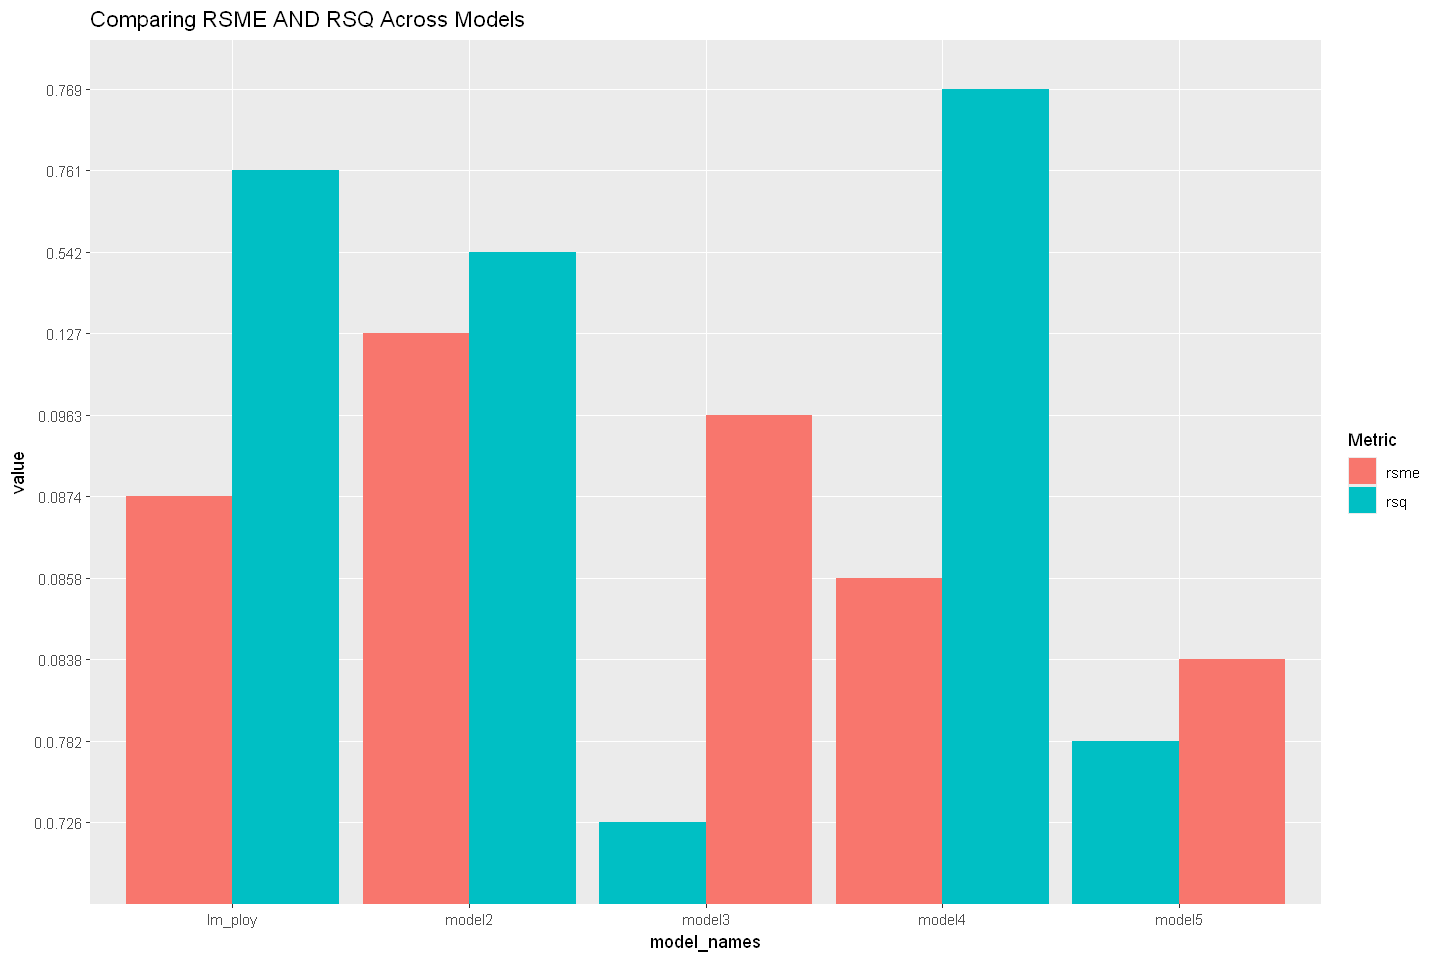

In [136]:
comparison_df %>%
  pivot_longer(!model_names) %>%
  ggplot(aes(x = model_names, y = value, fill = name)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Comparing RSME AND RSQ Across Models", fill = "Metric")

Create a Q-Q plot by plotting the distribution difference between the predictions generated by your best model and the true values on the test dataset.

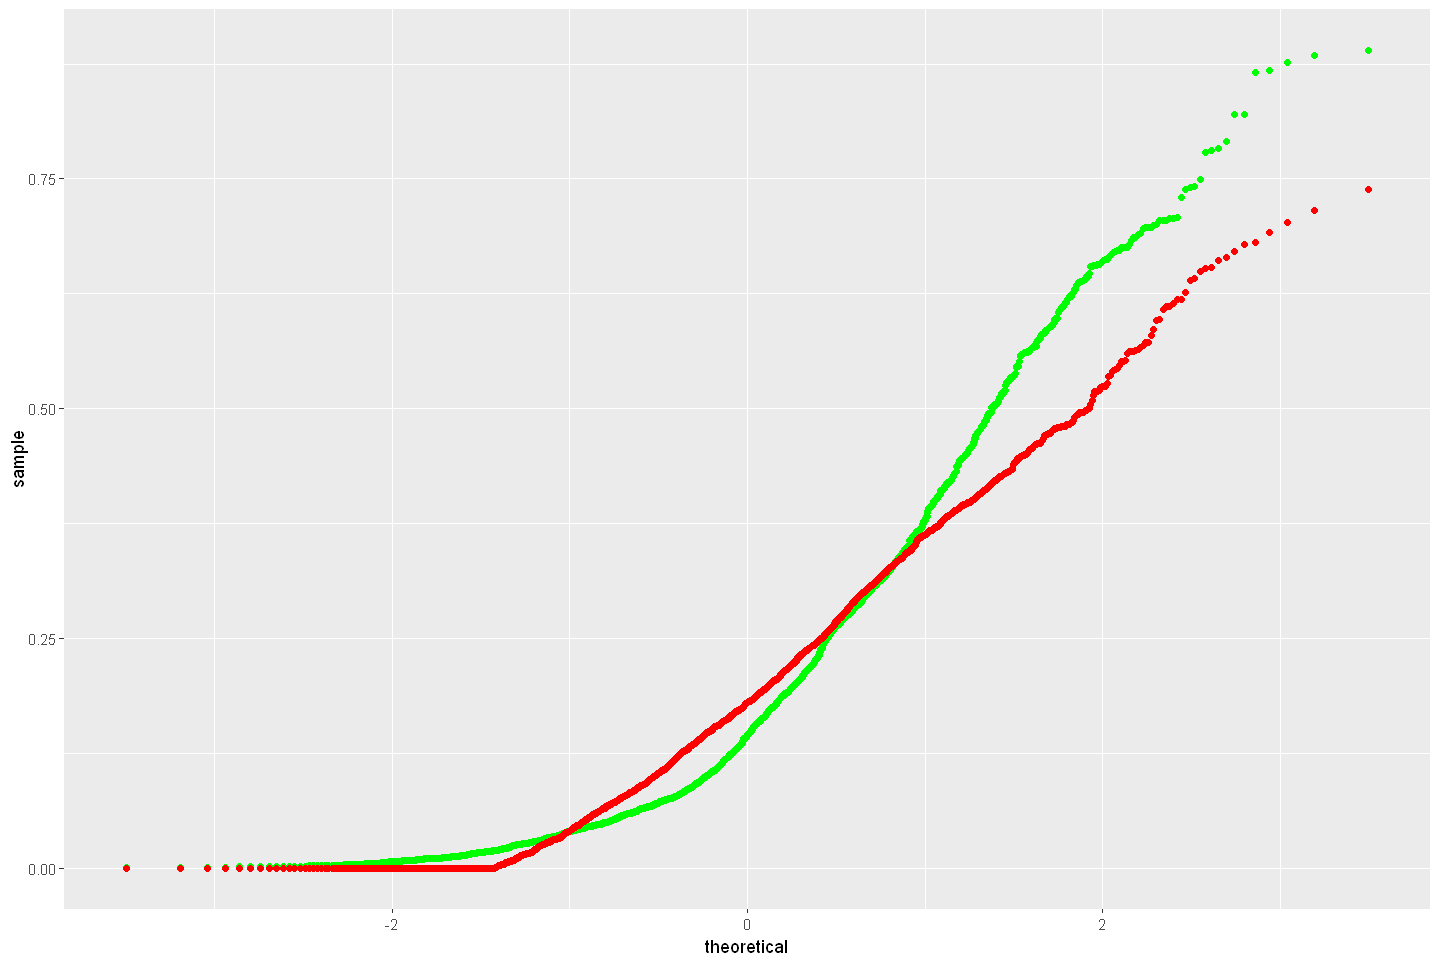

In [137]:
ggplot(model5_train_results) +
  stat_qq(aes(sample = truth), color = "green") +
  stat_qq(aes(sample = .pred), color = "red")

### Predict Rented Bike count using the forcast weather data for Seoul provided by OpenWeather

In [138]:
forecasted_weather <- read.csv("raw_cities_weather_forecast.csv")

In [139]:
seoul_forecasted_weather <- forecasted_weather %>% filter(CITY == "Seoul")

In [140]:
colnames(seoul_forecasted_weather)

[1] "CITY"              "WEATHER"           "VISIBILITY"       
 [4] "TEMP"              "TEMP_MIN"          "TEMP_MAX"         
 [7] "PRESSURE"          "HUMIDITY"          "WIND_SPEED"       
[10] "WIND_DEG"          "FORECAST_DATETIME"

In [141]:
seoul_bike_sharing <- read_csv("seoul_bike_sharing_converted_normalized.csv")
colnames(seoul_bike_sharing)

Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "DATE"                  "RENTED_BIKE_COUNT"     "TEMPERATURE"          
 [4] "HUMIDITY"              "WIND_SPEED"            "VISIBILITY"           
 [7] "DEW_POINT_TEMPERATURE" "SOLAR_RADIATION"       "RAINFALL"             
[10] "SNOWFALL"              "FUNCTIONING_DAY"       "AUTUMN"               
[13] "SPRING"                "SUMMER"                "WINTER"               
[16] "HOLIDAY"               "NO_HOLIDAY"            "0"                    
[19] "1"                     "10"                    "11"                   
[22] "12"                    "13"                    "14"                   
[25] "15"                    "16"                    "17"                   
[28] "18"                    "19"                    "2"                    
[31] "20"                    "21"                    "22"                   
[34] "23"                    "3"                     "4"                    
[37] "5"                     "6"                     "7"                    
[40] "8"                     "9"

In [142]:
seoul_forecasted_weather <- seoul_forecasted_weather[, -c(1:2, 5:7, 10)] %>%
  rename(TEMPERATURE = TEMP)

In [143]:
colnames(seoul_forecasted_weather)

[1] "VISIBILITY"        "TEMPERATURE"       "HUMIDITY"         
[4] "WIND_SPEED"        "FORECAST_DATETIME"

In [144]:
colSums(is.na(seoul_forecasted_weather))

VISIBILITY       TEMPERATURE          HUMIDITY        WIND_SPEED 
                0                 0                 0                 0 
FORECAST_DATETIME 
                0

In [145]:
# Extract HOUR from FORECAST_DATETIME. This is a 3 hours forecast which means hour 3 interavls for 5 dyas
seoul_forecasted_weather$HOUR <- format(as.POSIXct(seoul_forecasted_weather$FORECAST_DATETIME), format = "%H") %>% as.character()
colnames(seoul_forecasted_weather)

[1] "VISIBILITY"        "TEMPERATURE"       "HUMIDITY"         
[4] "WIND_SPEED"        "FORECAST_DATETIME" "HOUR"

In [146]:
seoul_forecasted_weather <- seoul_forecasted_weather[, -5]

Now we have to add columns which is not present in the forecast weather but present in Seoul Bike sharing dataset which include DEW_POINT_TEMPERATURE, SOLAR_RADIATION, RAINFALL, SNOWFALL and HOLIDAY.
For the first 4 columns we can use the average of the values in the Seoul sharing. However those columns depend on the season. So we need to check the season in forecast weather to make the Average for only that season.

In [147]:
unique(seoul_forecasted_weather$SEASONS)

NULL

But, March, 2024 is Spring Season.

In [148]:
# calculate avg columns during spring
avg_values <- seoul_bike_sharing %>%
  filter(SPRING == 1) %>%
  group_by(SPRING == 1) %>%
  summarise(avg_dew = mean(DEW_POINT_TEMPERATURE), avg_solar = mean(SOLAR_RADIATION), avg_rain = mean(RAINFALL), avg_snow = mean(SNOWFALL))
avg_values

SPRING == 1,avg_dew,avg_solar,avg_rain,avg_snow
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
TRUE,0.600197,0.1932673,0.00534127,0


In [149]:
# creating new columns and assigning the value of avg.
seoul_forecasted_weather$DEW_POINT_TEMPERATURE <- avg_values$avg_dew
seoul_forecasted_weather$SOLAR_RADIATION <- avg_values$avg_solar
seoul_forecasted_weather$RAINFALL <- avg_values$avg_rain
seoul_forecasted_weather$SNOWFALL <- avg_values$avg_snow

In [150]:
# For HOLIDAY column since it is 5 days in the forecast weather we will assume all values are No Holiday.
seoul_forecasted_weather$HOLIDAY <- "NO_HOLIDAY"
seoul_forecasted_weather$SEASONS <- "Spring"
# check columns types
str(seoul_forecasted_weather)

'data.frame':	40 obs. of  11 variables:
 $ VISIBILITY           : int  10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 ...
 $ TEMPERATURE          : num  18.9 17.2 14.3 13.3 12.5 ...
 $ HUMIDITY             : int  43 45 47 46 49 50 48 42 41 42 ...
 $ WIND_SPEED           : num  2.09 3.37 4.09 3.04 2.12 1.77 1.71 2 4.62 3.52 ...
 $ HOUR                 : chr  "06" "09" "12" "15" ...
 $ DEW_POINT_TEMPERATURE: num  0.6 0.6 0.6 0.6 0.6 ...
 $ SOLAR_RADIATION      : num  0.193 0.193 0.193 0.193 0.193 ...
 $ RAINFALL             : num  0.00534 0.00534 0.00534 0.00534 0.00534 ...
 $ SNOWFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HOLIDAY              : chr  "NO_HOLIDAY" "NO_HOLIDAY" "NO_HOLIDAY" "NO_HOLIDAY" ...
 $ SEASONS              : chr  "Spring" "Spring" "Spring" "Spring" ...


#### Now the final step will be to convert categorical variables to numeric values.

In [151]:
# Convert SEASONS, HOLIDAY and HOUR columns into indicator columns.
col <- c("SEASONS", "HOLIDAY", "HOUR")
feature <- function(x) {
    for (x in col) {
        seoul_forecasted_weather <<- seoul_forecasted_weather %>%
        mutate(dummy = 1) %>%
        spread(key = x, value = dummy, fill = 0)
  }
}
feature()

In [152]:
# rename some hour columns to match the `seoul-bike sharing` dataset
seoul_forecasted_weather <- seoul_forecasted_weather %>%
  rename("0" = "00", "3" = "03", "6" = "06", "9" = "09", SPRING = Spring)

In [153]:
# Since we have only 1 Season which spring for example, we will not have any column for winter, etc.. so we need to add those manually.

seoul_forecasted_weather$AUTUMN <- 0
seoul_forecasted_weather$SUMMER <- 0
seoul_forecasted_weather$WINTER <- 0
seoul_forecasted_weather$HOLIDAY <- 0
seoul_forecasted_weather$"1" <- seoul_forecasted_weather$"0"
seoul_forecasted_weather$"2" <- seoul_forecasted_weather$"0"
seoul_forecasted_weather$"4" <- seoul_forecasted_weather$"3"
seoul_forecasted_weather$"5" <- seoul_forecasted_weather$"3"
seoul_forecasted_weather$"7" <- seoul_forecasted_weather$"6"
seoul_forecasted_weather$"8" <- seoul_forecasted_weather$"6"
seoul_forecasted_weather$"10" <- seoul_forecasted_weather$"9"
seoul_forecasted_weather$"11" <- seoul_forecasted_weather$"9"
seoul_forecasted_weather$"13" <- seoul_forecasted_weather$"12"
seoul_forecasted_weather$"14" <- seoul_forecasted_weather$"12"
seoul_forecasted_weather$"16" <- seoul_forecasted_weather$"15"
seoul_forecasted_weather$"17" <- seoul_forecasted_weather$"15"
seoul_forecasted_weather$"19" <- seoul_forecasted_weather$"18"
seoul_forecasted_weather$"20" <- seoul_forecasted_weather$"18"
seoul_forecasted_weather$"22" <- seoul_forecasted_weather$"21"
seoul_forecasted_weather$"23" <- seoul_forecasted_weather$"21"

In [154]:
str(seoul_forecasted_weather)

'data.frame':	40 obs. of  38 variables:
 $ VISIBILITY           : int  10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 ...
 $ TEMPERATURE          : num  10.3 10.9 11.2 11.6 12 ...
 $ HUMIDITY             : int  42 41 48 40 50 59 37 30 49 48 ...
 $ WIND_SPEED           : num  1.57 0.99 1.59 1.23 1.77 1.56 1.18 1.12 2.12 1.71 ...
 $ DEW_POINT_TEMPERATURE: num  0.6 0.6 0.6 0.6 0.6 ...
 $ SOLAR_RADIATION      : num  0.193 0.193 0.193 0.193 0.193 ...
 $ RAINFALL             : num  0.00534 0.00534 0.00534 0.00534 0.00534 ...
 $ SNOWFALL             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SPRING               : num  1 1 1 1 1 1 1 1 1 1 ...
 $ NO_HOLIDAY           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ 0                    : num  0 0 0 0 0 0 0 1 0 1 ...
 $ 3                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 6                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 9                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 12                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 15                 

In [155]:
# Normalize the data
seoul_forecasted_weather <<- seoul_forecasted_weather %>% mutate(TEMPERATURE = rescale(TEMPERATURE, to = 0:1), 
                                                     HUMIDITY = rescale(HUMIDITY, to = 0:1), 
                                                     WIND_SPEED = rescale(WIND_SPEED, to = 0:1), 
                                                     VISIBILITY = rescale(VISIBILITY, to = 0:1), 
                                                     DEW_POINT_TEMPERATURE = rescale(DEW_POINT_TEMPERATURE, to = 0:1), 
                                                     SOLAR_RADIATION = rescale(SOLAR_RADIATION, to = 0:1), 
                                                     RAINFALL = rescale(RAINFALL, to = 0:1), 
                                                     SNOWFALL = rescale(SNOWFALL, to = 0:1))

In [156]:
# summary
summary(seoul_forecasted_weather)

   VISIBILITY   TEMPERATURE        HUMIDITY        WIND_SPEED    
 Min.   :0.5   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5   1st Qu.:0.2367   1st Qu.:0.1776   1st Qu.:0.2456  
 Median :0.5   Median :0.4182   Median :0.4211   Median :0.4113  
 Mean   :0.5   Mean   :0.4425   Mean   :0.4204   Mean   :0.4620  
 3rd Qu.:0.5   3rd Qu.:0.6707   3rd Qu.:0.6382   3rd Qu.:0.7129  
 Max.   :0.5   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 DEW_POINT_TEMPERATURE SOLAR_RADIATION    RAINFALL      SNOWFALL       SPRING 
 Min.   :0.5           Min.   :0.5     Min.   :0.5   Min.   :0.5   Min.   :1  
 1st Qu.:0.5           1st Qu.:0.5     1st Qu.:0.5   1st Qu.:0.5   1st Qu.:1  
 Median :0.5           Median :0.5     Median :0.5   Median :0.5   Median :1  
 Mean   :0.5           Mean   :0.5     Mean   :0.5   Mean   :0.5   Mean   :1  
 3rd Qu.:0.5           3rd Qu.:0.5     3rd Qu.:0.5   3rd Qu.:0.5   3rd Qu.:1  
 Max.   :0.5           Max.   :0.5     Max.   :0.5   Max.   :0.5

In [157]:
# now we are ready to run the model 5 to predict the rented bike count
model5_predict_results <- model5_fit %>% predict(new_data = seoul_forecasted_weather)
model5_predict_results$.pred <- replace(model5_predict_results$.pred, model5_predict_results$.pred < 0, 0)

# assign the value to new column rented bike count
seoul_forecasted_weather$RENTED_BIKE_COUNT <- model5_predict_results$.pred
head(seoul_forecasted_weather)

,VISIBILITY,TEMPERATURE,HUMIDITY,WIND_SPEED,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,SNOWFALL,SPRING,NO_HOLIDAY,⋯,11,13,14,16,17,19,20,22,23,RENTED_BIKE_COUNT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.5,0.00000000,0.5526316,0.3237251,0.5,0.5,0.5,0.5,1,1,⋯,0,0,0,0,0,0,0,1,1,0.7717505
2,0.5,0.05066667,0.5263158,0.1951220,0.5,0.5,0.5,0.5,1,1,⋯,0,0,0,0,0,0,0,1,1,0.6770701
3,0.5,0.08000000,0.7105263,0.3281596,0.5,0.5,0.5,0.5,1,1,⋯,0,0,0,0,0,1,1,0,0,0.8421597
4,0.5,0.11200000,0.5000000,0.2483370,0.5,0.5,0.5,0.5,1,1,⋯,0,0,0,0,0,1,1,0,0,0.8022664
5,0.5,0.14933333,0.7631579,0.3680710,0.5,0.5,0.5,0.5,1,1,⋯,0,0,0,0,0,0,0,1,1,0.5875480
6,0.5,0.16711111,1.0000000,0.3215078,0.5,0.5,0.5,0.5,1,1,⋯,0,0,0,1,1,0,0,0,0,0.1231666


In [158]:
# Compare the summery statistics between true values from bike sharing dataset and predict values
seoul_bike_sharing %>% filter(SPRING == 1) %>% select(RENTED_BIKE_COUNT) %>%
                       summary(seoul_bike_sharing$RENTED_BIKE_COUNT)

 RENTED_BIKE_COUNT
 Min.   :0.00000  
 1st Qu.:0.06275  
 Median :0.16798  
 Mean   :0.20941  
 3rd Qu.:0.31401  
 Max.   :0.91418  

In [159]:
summary(seoul_forecasted_weather$RENTED_BIKE_COUNT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.09293 0.21346 0.28523 0.84216 

We can see from the comparing statistics that in general our prediction is very near to the truth.

In [161]:
max_seoul_bike <- suppressMessages(read_csv("seoul_bike_sharing.csv")) %>% filter(SEASONS == "Spring") %>% 
                                      summarize(max_seoul_bike = max(RENTED_BIKE_COUNT))%>% unlist() %>% unname()
max_seoul_bike
min_seoul_bike <- suppressMessages(read_csv("seoul_bike_sharing.csv")) %>% filter(SEASONS == "Spring") %>% 
                                      summarize(min_seoul_bike = min(RENTED_BIKE_COUNT))%>% unlist() %>% unname()
min_seoul_bike

[1] 3251

[1] 2

In [162]:
seoul_forecasted_weather$RENTED_BIKE_COUNT <- floor((max_seoul_bike - min_seoul_bike) * seoul_forecasted_weather$RENTED_BIKE_COUNT + min_seoul_bike)
seoul_forecasted_weather$RENTED_BIKE_COUNT

[1] 2509 2201 2738 2608 1910  402  748  693 2439  598 1468 1686  542    2    2
[16] 2182  352  291    2  316 1897    2  196    2    2    2    2  247    2  383
[31]    2  640    2    2    2  681    2   51    2    2